# Table of content
1. Objective
2. Input data
3. Processing data
4. Analyse
5. Conclusion
6. Suggestion


# 1. Objective:
- Detect customer has high potential default after applying for a loan
- Ensure that the consumers capable of repaying the loan are not rejected.
- Build machine learning models to predict high-risk customer

# 2. Input data

In [164]:
import pandas as pd
import numpy as np          
import decimal
import datetime 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
from pylab import rcParams

In [165]:
df_app= pd.read_csv('/Users/alvin/Desktop/Alvin_CFH/Bank/ Bank Loan Default Risk Analysis/application_data.csv')

In [166]:
df_app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0           100002       1         Cash loans           M            N  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0                    Y             0          202500.0    406597.5  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20   
0           24700.5  ...                 0                0                0  \
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY   
0                     0                        0.0                       0.0  \
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
0                              0.0                        0.0  \
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [167]:
df_app.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# 3. Processing data

application df

In [168]:
#drop unimportant columns in df_app
df_app = df_app.drop(columns = [
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG','COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])

In [169]:
# % null value in each column in df_app
round(df_app.isnull().sum() / df_app.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [170]:
df_app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [171]:
df_app.shape

(307511, 52)

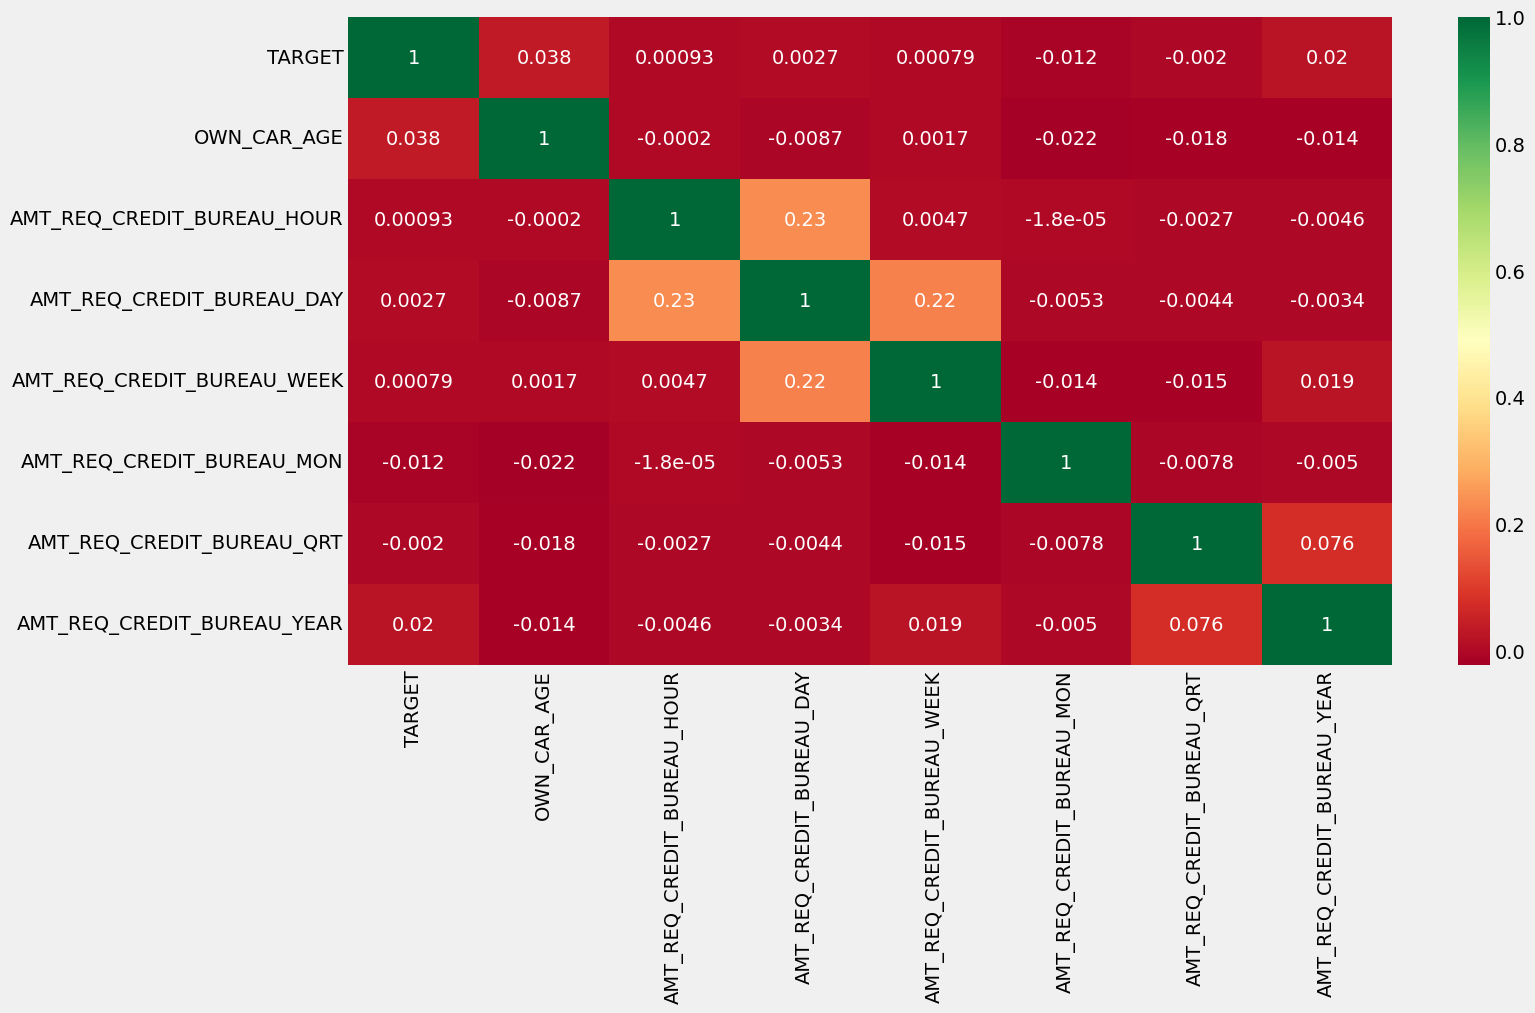

In [172]:
# check correlation between the columns which has high %null value and the target column
df_app_corr = df_app[['TARGET', 'OWN_CAR_AGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]

df_app_corr = df_app_corr.corr()
ax = sns.heatmap(df_app_corr,
            xticklabels=df_app_corr.columns,
            yticklabels=df_app_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [173]:
# drop AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT due to no correlation with target column
df_app = df_app.drop(columns = ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','OWN_CAR_AGE'])

In [174]:
df_app.shape

(307511, 49)

fill null value in application df

In [175]:
round(df_app.isnull().sum() / df_app.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [176]:
df_app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

solve null value in OCCUPATION_TYPE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR

In [177]:
#fill null value in OCCUPATION_TYPE column with 'Other'
df_app['OCCUPATION_TYPE'] = df_app['OCCUPATION_TYPE'].fillna('Other')

In [178]:
df_app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Other                    96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

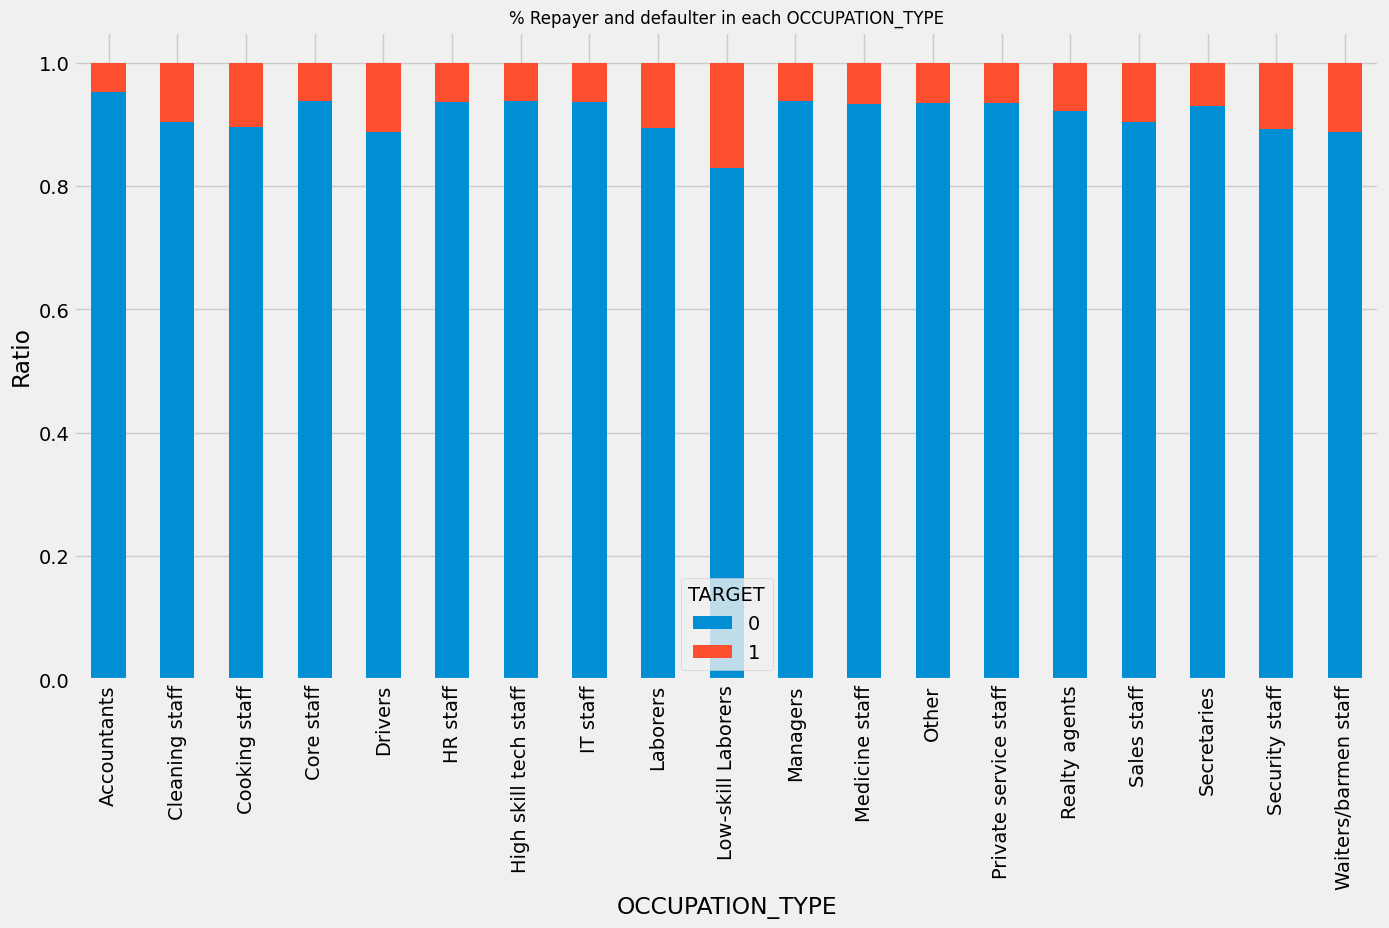

In [179]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df_app.OCCUPATION_TYPE, df_app.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('% Repayer and defaulter in each OCCUPATION_TYPE', fontsize=12)
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Ratio')
plt.show()

INSIGHT: Low-skill Labourers has the highest default risk.

Solve null value

Check % Repayer and defaulter of each value in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR to decide how to fill null value

In [180]:
df_AMT_REQ_CREDIT_BUREAU = df_app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']]

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_19997/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


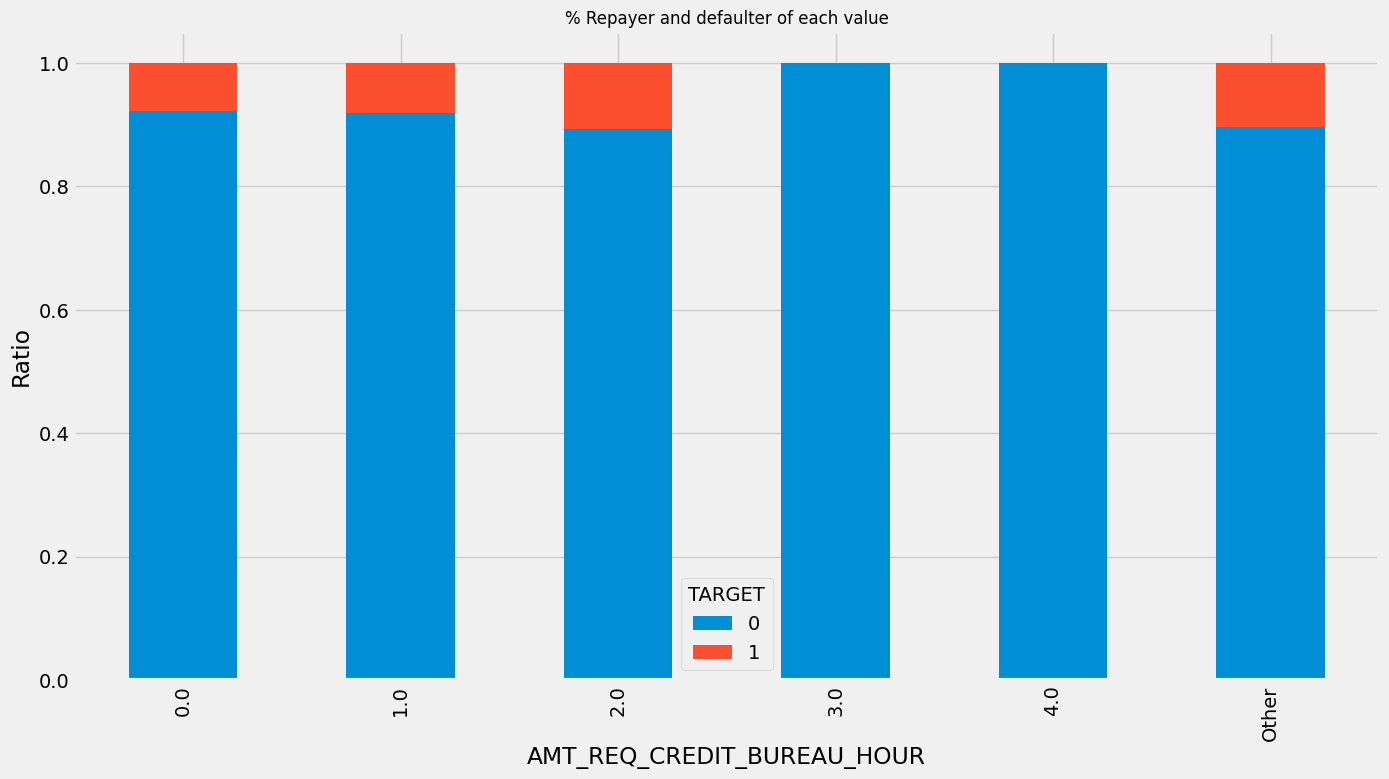

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_19997/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


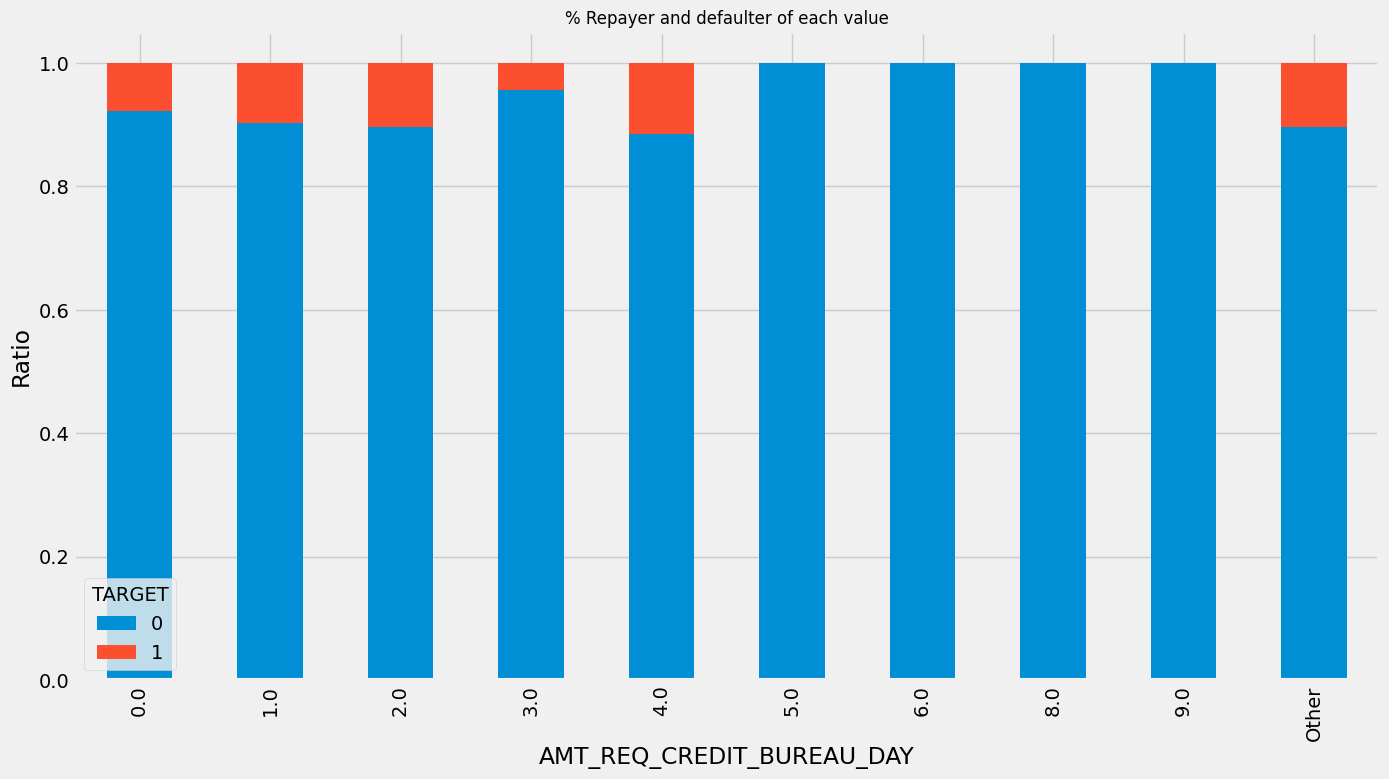

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_19997/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


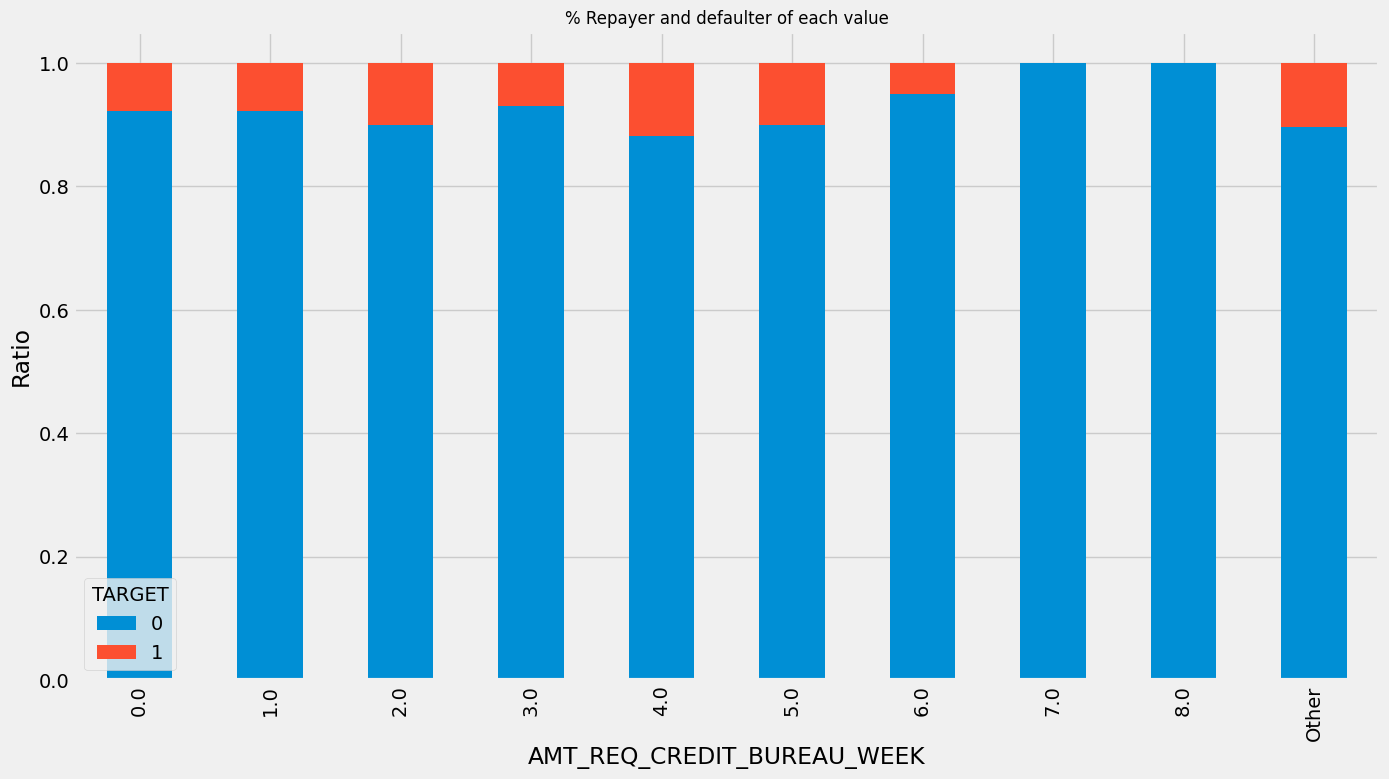

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_19997/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


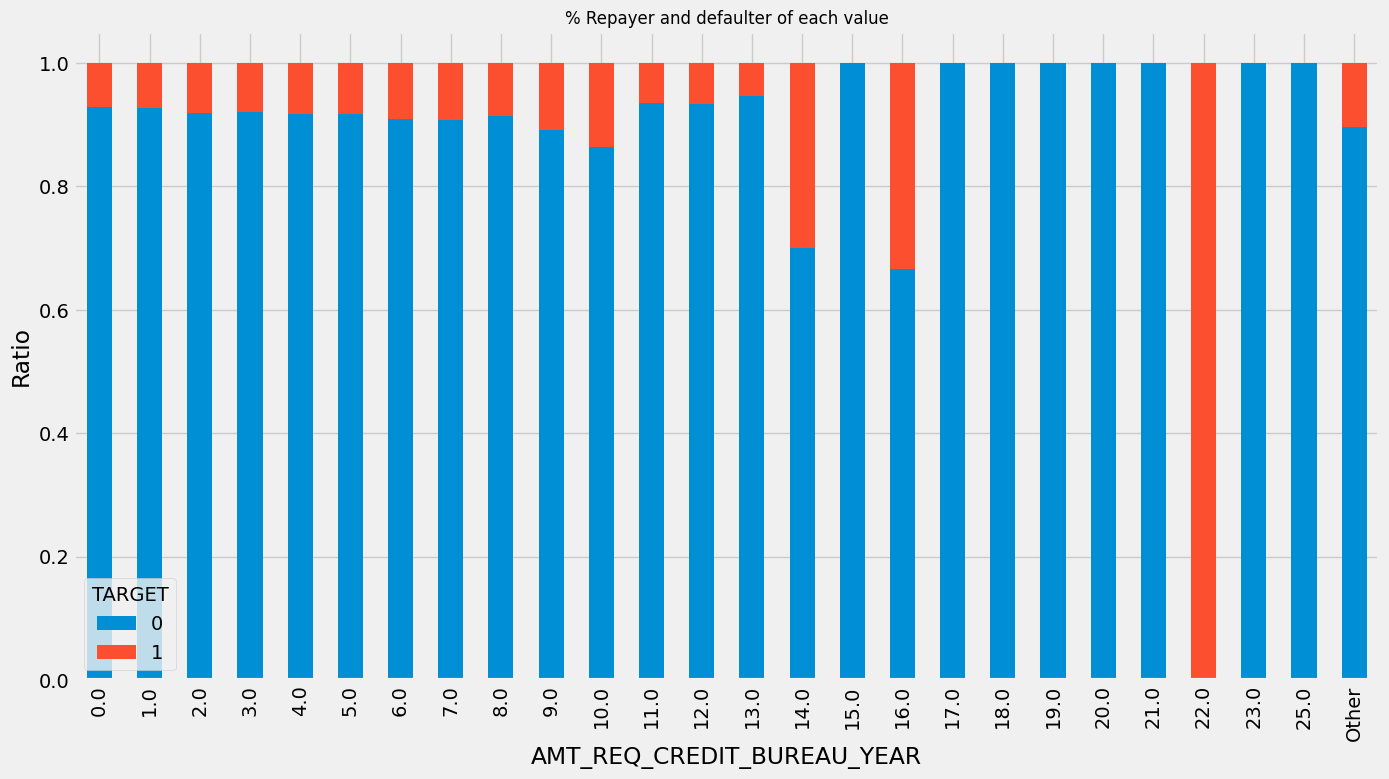

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_19997/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


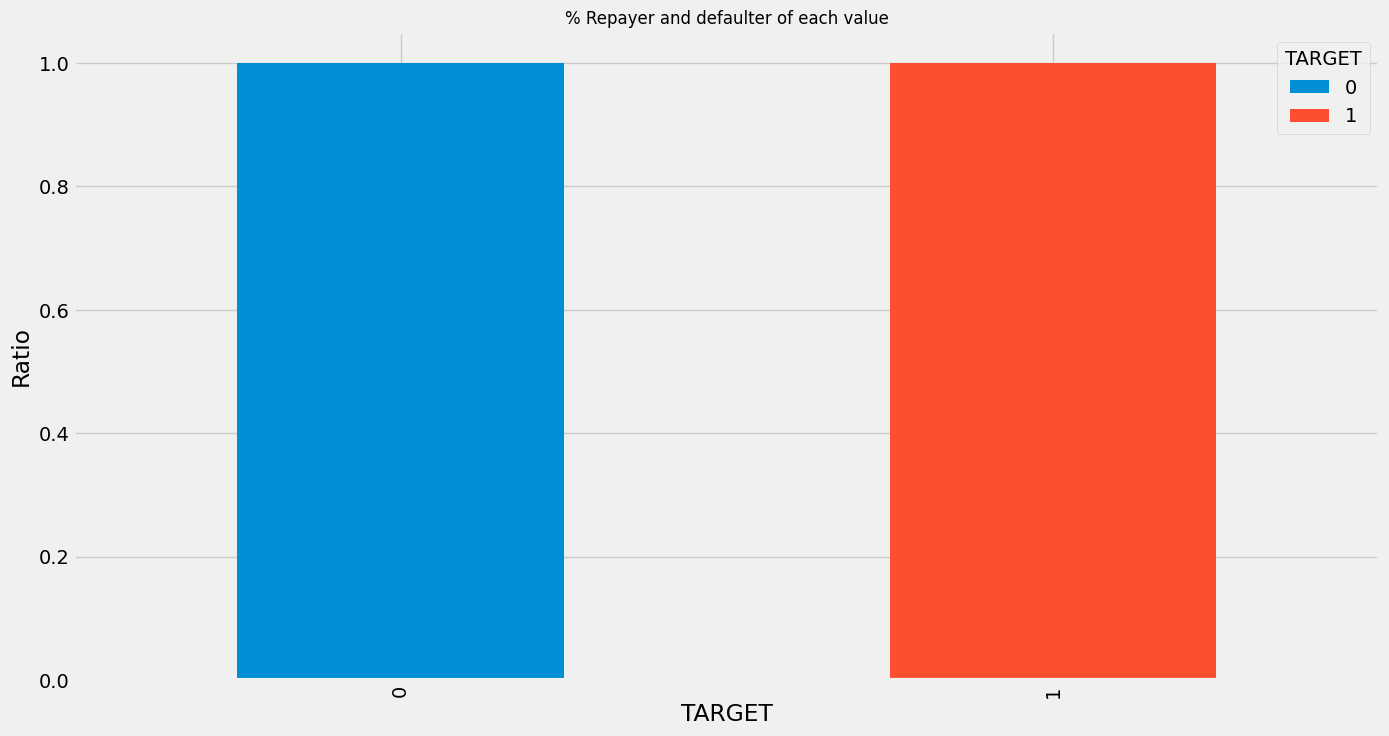

In [181]:
for col in df_AMT_REQ_CREDIT_BUREAU:
    df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')
    plt.rcParams['figure.figsize'] = [15, 8]
    ax= plt.style.use('fivethirtyeight')
    table=pd.crosstab(df_AMT_REQ_CREDIT_BUREAU[col], df_AMT_REQ_CREDIT_BUREAU.TARGET)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title('% Repayer and defaulter of each value', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Ratio')
    plt.show()
    

In [182]:
#Due to the similarity between % Repayer and defaulter in each value in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR, we can fill null value with the median
df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace = True)
df_app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace = True)
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace = True)
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace = True)

In [183]:
# % null value in each column in df_app
round(df_app.isnull().sum() / df_app.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [184]:
df_app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0           100002       1         Cash loans           M            N  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0                    Y             0          202500.0    406597.5  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...       ORGANIZATION_TYPE OBS_30_CNT_SOCIAL_CIRCLE   
0           24700.5  ...  Business Entity Type 3                      2.0  \
1           35698.5  ...                  School                      1.0   
2            6750.0  ...              Government                      0.0   
3           29686.5  ...  Business Entity Type 3                      2.0   
4           21865.5  ...                Religion                      0.0   
...             ...  ...                     ...                      ...   
307506      27558.0  ...                Services                      0.0   
307507      12001.5  ...                     XNA                      0.0   
307508      29979.0  ...                  School                      6.0   
307509      20205.0  ...  Business Entity Type 1                      0.0   
307510      49117.5  ...  Business Entity Type 3                      0.0   

       DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE   
0                           2.0                      2.0  \
1                           0.0                      1.0   
2                           0.0                      0.0   
3                           0.0                      2.0   
4                           0.0                      0.0   
...                         ...                      ...   
307506                      0.0                      0.0   
307507                      0.0                      0.0   
307508                      0.0                      6.0   
307509                      0.0                      0.0   
307510                      0.0                      0.0   

       DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE   
0                           2.0                -1134.0  \
1                           0.0                 -828.0   
2                           0.0                 -815.0   
3                           0.0                 -617.0   
4                           0.0                -1106.0   
...                         ...                    ...   
307506                      0.0                 -273.0   
307507                      0.0                    0.0   
307508                      0.0                -1909.0   
307509                      0.0                 -322

Standardize Values

In [185]:
#Convert DAYS_BIRTH,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE from negative to positive as days cannot be negative
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
df_app['DAYS_EMPLOYED'] = abs(df_app['DAYS_EMPLOYED'])
df_app['DAYS_REGISTRATION'] = abs(df_app['DAYS_REGISTRATION'])
df_app['DAYS_ID_PUBLISH'] = abs(df_app['DAYS_ID_PUBLISH'])
df_app['DAYS_LAST_PHONE_CHANGE'] = abs(df_app['DAYS_LAST_PHONE_CHANGE'])


Standardize values

In [186]:
df_app['AMT_INCOME_TOTAL']=df_app['AMT_INCOME_TOTAL']/100000

In [187]:
df_app['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [188]:
#Classify customer income

# Range for customer income
bins = [0, 1.15, 1.5, 2, 3, 10, 12] 

labels = ['0-115K', '115K-150K','150K-200K','200K-300K', '300K-1M','Above 1M'] 


df_app['INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

In [189]:
df_app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0           100002       1         Cash loans           M            N  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0                    Y             0             2.025    406597.5  \
1                    N             0             2.700   1293502.5   
2                    Y             0             0.675    135000.0   
3                    Y             0             1.350    312682.5   
4                    Y             0             1.215    513000.0   
...                ...           ...               ...         ...   
307506               N             0             1.575    254700.0   
307507               Y             0             0.720    269550.0   
307508               Y             0             1.530    677664.0   
307509               Y             0             1.710    370107.0   
307510               N             0             1.575    675000.0   

        AMT_ANNUITY  ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE   
0           24700.5  ...                       2.0                      2.0  \
1           35698.5  ...                       1.0                      0.0   
2            6750.0  ...                       0.0                      0.0   
3           29686.5  ...                       2.0                      0.0   
4           21865.5  ...                       0.0                      0.0   
...             ...  ...                       ...                      ...   
307506      27558.0  ...                       0.0                      0.0   
307507      12001.5  ...                       0.0                      0.0   
307508      29979.0  ...                       6.0                      0.0   
307509      20205.0  ...                       0.0                      0.0   
307510      49117.5  ...                       0.0                      0.0   

       OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE   
0                           2.0                      2.0  \
1                           1.0                      0.0   
2                           0.0                      0.0   
3                           2.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
307506                      0.0                      0.0   
307507                      0.0                      0.0   
307508                      6.0                      0.0   
307509                      0.0                      0.0   
307510                      0.0                      0.0   

       DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR   
0                      1134.0                        0.0  \
1                       828.0                        0.0   
2                       815.0                        0.0   
3                       617.0                        0.0   
4                      1106.0                        0.0   
...                       ...                        ...   
307506                  273.0                        0.0   
307507                    0.0                        0.0   
307508                 1909.0                        1.0   
307509  

In [190]:
df_app['INCOME_RANGE'].value_counts(normalize=True)*100

INCOME_RANGE
0-115K       32.763955
200K-300K    21.205584
150K-200K    20.922848
115K-150K    17.760686
300K-1M       7.316994
Above 1M      0.029933
Name: proportion, dtype: float64

INSIGHT: 
- Loan Applicant has income range in 0-115K is the highest which accounts for 32.76%
- Most of loan applicants have income less than 300K accounting for about 92%

In [191]:
df_app['AMT_CREDIT']=df_app['AMT_CREDIT']/100000

In [192]:
df_app['AMT_CREDIT'].describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

In [193]:
# Range for customer credit
bins = [0, 3, 5, 8, 10, 41] 

labels = ['0-300K', '300-500K','500K-800K','800K-1M','Above 1M'] 


df_app['CREDIT_RANK'] = pd.cut(df_app['AMT_CREDIT'], bins=bins, labels=labels)

In [194]:
df_app['CREDIT_RANK'].value_counts(normalize=True)*100

CREDIT_RANK
0-300K       29.578454
500K-800K    25.193896
300-500K     18.983386
Above 1M     16.254703
800K-1M       9.989561
Name: proportion, dtype: float64

INSIGHT: More than 16% of customers who take the credit amount more than 1M.

In [195]:
df_app['DAYS_BIRTH']=df_app['DAYS_BIRTH']/365

In [196]:
df_app['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [197]:
# Range for customer credit
bins = [0, 20, 30, 40, 50, 70] 

labels = ['0-20', '20-30','30-40','40-50','Above 50'] 


df_app['CUSTOMER_AGE'] = pd.cut(df_app['DAYS_BIRTH'], bins=bins, labels=labels)

In [198]:
df_app['CUSTOMER_AGE'].value_counts(normalize=True)*100

CUSTOMER_AGE
Above 50    33.703185
30-40       26.765872
40-50       24.890492
20-30       14.640452
0-20         0.000000
Name: proportion, dtype: float64

INSIGHT: Loan Applicant has age above 50 is the highest which accounts for 33.70%

In [199]:
df_app['YEARS_EMPLOYED']=df_app['DAYS_EMPLOYED']/365

In [200]:
df_app['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [201]:
# Range for customer credit
bins = [0, 5, 10, 20, 30, 50, 60, 150] 

labels = ['0-5', '5-10','10-20','20-30','30-50', '50-60','Above 50'] 


df_app['YEARS_EMPLOYED'] = pd.cut(df_app['YEARS_EMPLOYED'], bins=bins, labels=labels)

In [202]:
df_app['YEARS_EMPLOYED'].value_counts(normalize=True)*100

YEARS_EMPLOYED
0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-50        1.191822
50-60        0.000000
Above 50     0.000000
Name: proportion, dtype: float64

INSIGHT: Most of loan Applicants have less than 5 years working experience, and accounts for 54.06%

In [203]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Check outliers for AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_EMPLOYED

In [204]:
df_app[['AMT_INCOME_TOTAL','AMT_CREDIT', 'DAYS_EMPLOYED']].describe()

AMT_INCOME_TOTAL     AMT_CREDIT  DAYS_EMPLOYED
count     307511.000000  307511.000000  307511.000000
mean           1.687979       5.990260   67724.742149
std            2.371231       4.024908  139443.751806
min            0.256500       0.450000       0.000000
25%            1.125000       2.700000     933.000000
50%            1.471500       5.135310    2219.000000
75%            2.025000       8.086500    5707.000000
max         1170.000000      40.500000  365243.000000

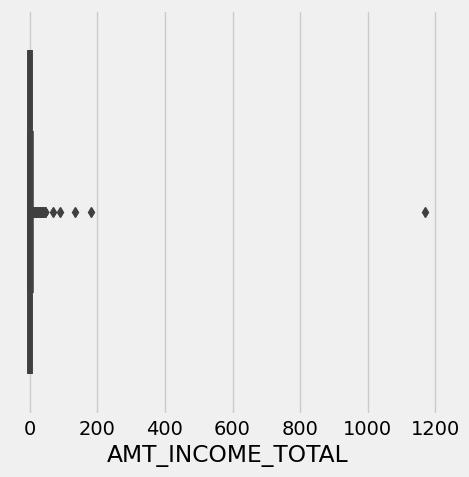

In [205]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=df_app['AMT_INCOME_TOTAL'])
plt.show()

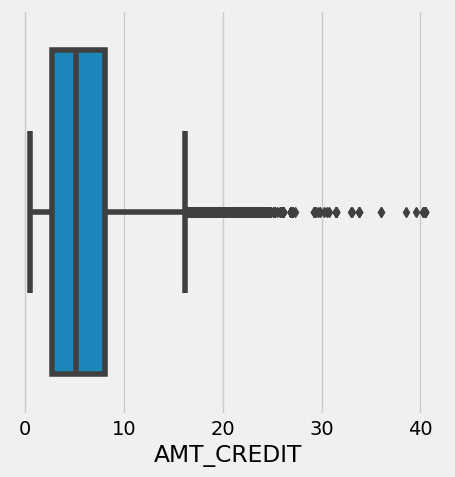

In [206]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=df_app['AMT_CREDIT'])
plt.show()

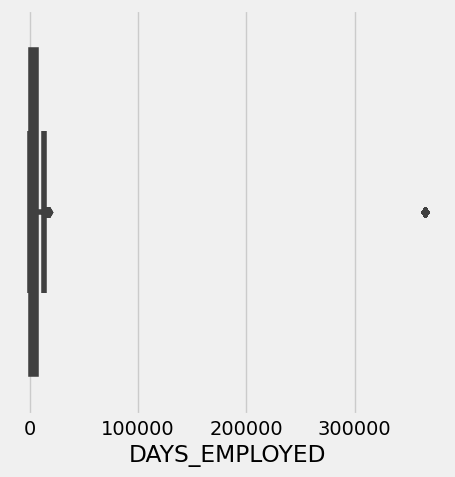

In [207]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=df_app['DAYS_EMPLOYED'])
plt.show()

In [208]:
categorical_cols = df_app.select_dtypes(include=['object', 'category'])
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   NAME_CONTRACT_TYPE          307511 non-null  object  
 1   CODE_GENDER                 307511 non-null  object  
 2   FLAG_OWN_CAR                307511 non-null  object  
 3   FLAG_OWN_REALTY             307511 non-null  object  
 4   NAME_TYPE_SUITE             306219 non-null  object  
 5   NAME_INCOME_TYPE            307511 non-null  object  
 6   NAME_EDUCATION_TYPE         307511 non-null  object  
 7   NAME_FAMILY_STATUS          307511 non-null  object  
 8   NAME_HOUSING_TYPE           307511 non-null  object  
 9   OCCUPATION_TYPE             307511 non-null  object  
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object  
 11  ORGANIZATION_TYPE           307511 non-null  object  
 12  INCOME_RANGE                307353 non-null  category
 13 

In [209]:
numeric_cols = df_app.select_dtypes(include='number')
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  float64
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  FLAG_MOBIL                   307511 non-null  int64  
 13 

In [210]:
#Fill NaN then check normal distribution
null_counts = numeric_cols.isnull().sum()
print(null_counts)

SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY     

In [211]:
numeric_cols = numeric_cols.fillna(0)

In [212]:
#Check whether the data follow a normal distribution?
from scipy.stats import shapiro
stat, p = shapiro(numeric_cols)
print('Statistic =', stat, ', p-value =', p)
alpha = 0.05  # Significance level
if p > alpha:
    print('the data follows a normal distribution')
else:
    print('the data does not follow a normal distribution')

Statistic = 0.2244923710823059 , p-value = 0.0
the data does not follow a normal distribution


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [213]:
#deal with outliers using z-score
from scipy import stats
z_scores = stats.zscore(numeric_cols)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

# Replace the outliers with the cloest value
def replace_outliers_with_closest(numeric_cols):
    outliers = np.where(z_scores > threshold)[0] 
    non_outliers = np.where(z_scores <= threshold)[0]
    
    for outlier in outliers:
        distances = dist(numeric_cols[outlier].reshape(1, -1), numeric_cols[non_outliers])
        closest_index = np.argmin(distances)
        numeric_cols[outlier] = numeric_cols[non_outliers[closest_index]]
    
    return numeric_cols


# 4. Analyse 

Categorical Columns Analysis:
- Find insight in each categorical column
- Check whether column is a useful variable to build predictive models by comparing the differences between default cases in each columns

In [214]:
def univariate_categorical(feature):  
    cat_perc = df_app[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
#First chart:  Count plot of each feature in categorical_cols data frame and TARGET;
    df = df_app[[feature, 'TARGET']]
    df = sns.countplot(x = feature, data=df_app, hue ="TARGET", 
                        order=cat_perc[feature], palette=['g','r'])
    plt.title('Count Value', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'g'})
    plt.xticks(rotation=45)
    plt.legend(['Repayer','Defaulter'])
#Second chart: Percentage of defaulters within column in categorical_cols data frame
    plt.rcParams['figure.figsize'] = [15, 8]
    ax= plt.style.use('fivethirtyeight')
    table=pd.crosstab(categorical_cols[feature], df_app.TARGET)
    values = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['g','r'])
    plt.title('% Repayer and defaulter of each value', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'g'})
    plt.xlabel('',fontsize=10)
    plt.ylabel('Percentage %')
    plt.xticks(rotation=45)
    plt.legend(['Repayer','Defaulter'])
    plt.show()

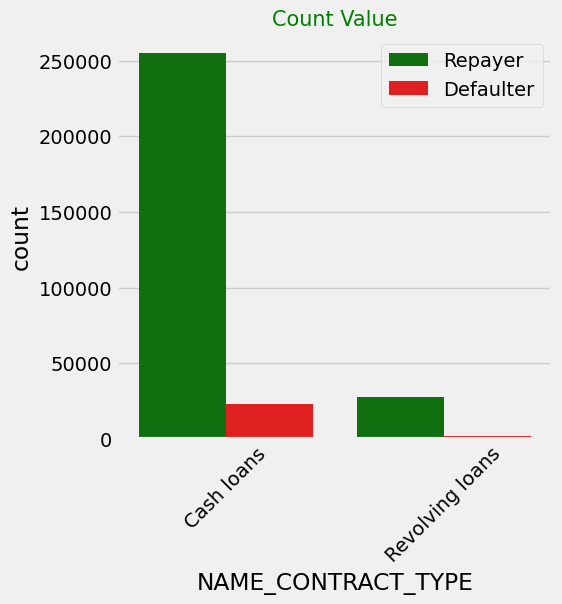

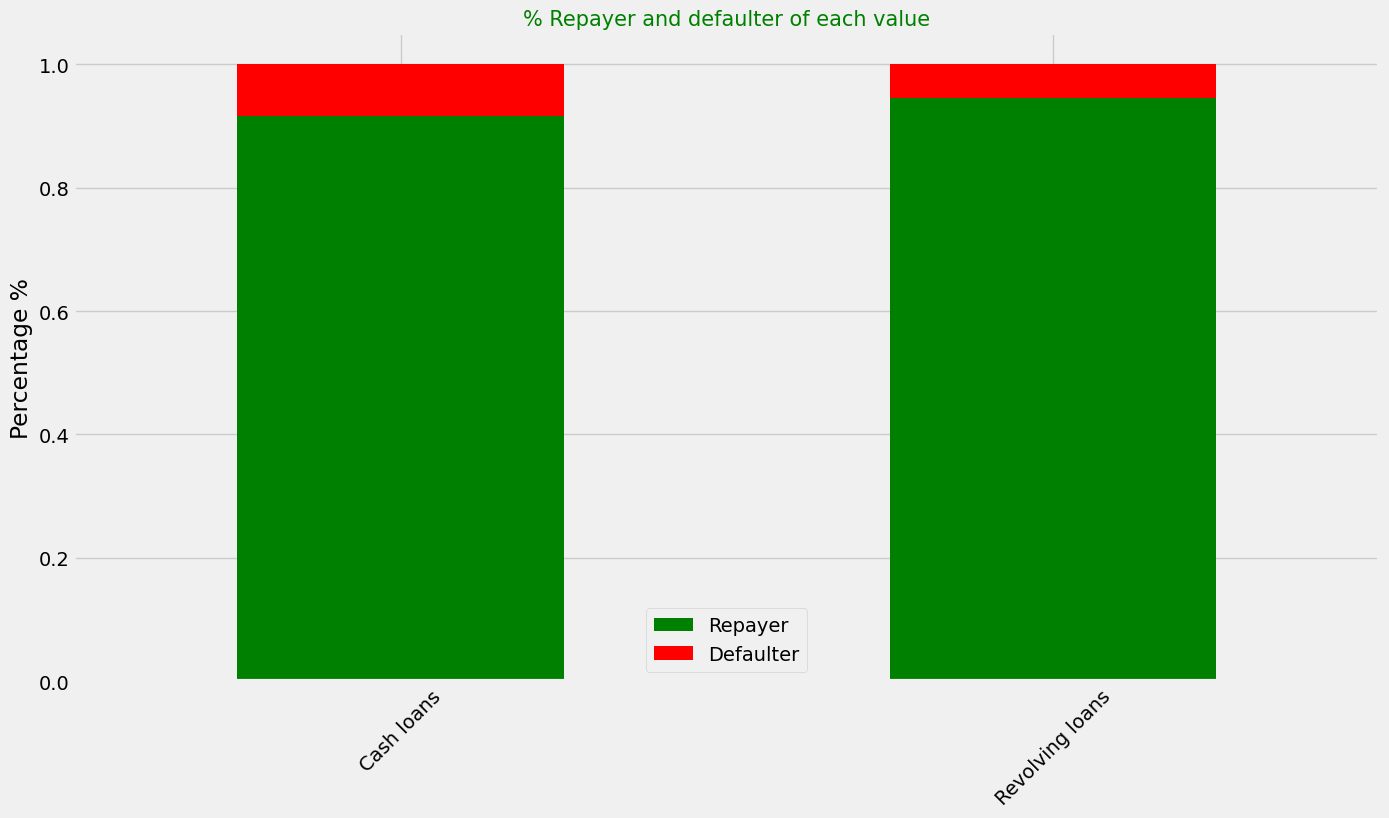

In [215]:
univariate_categorical('NAME_CONTRACT_TYPE')

INSIGHT: Most of the default cases are cash loans

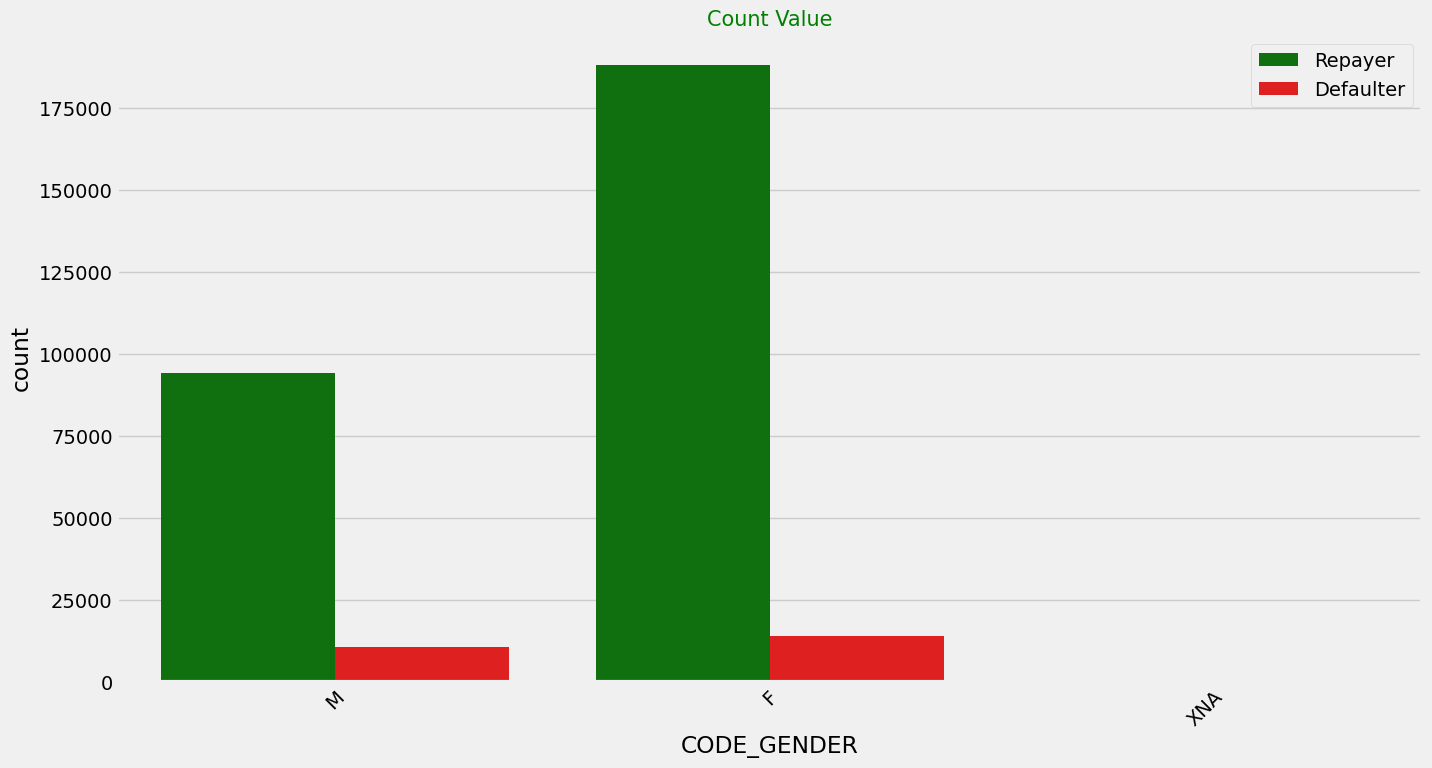

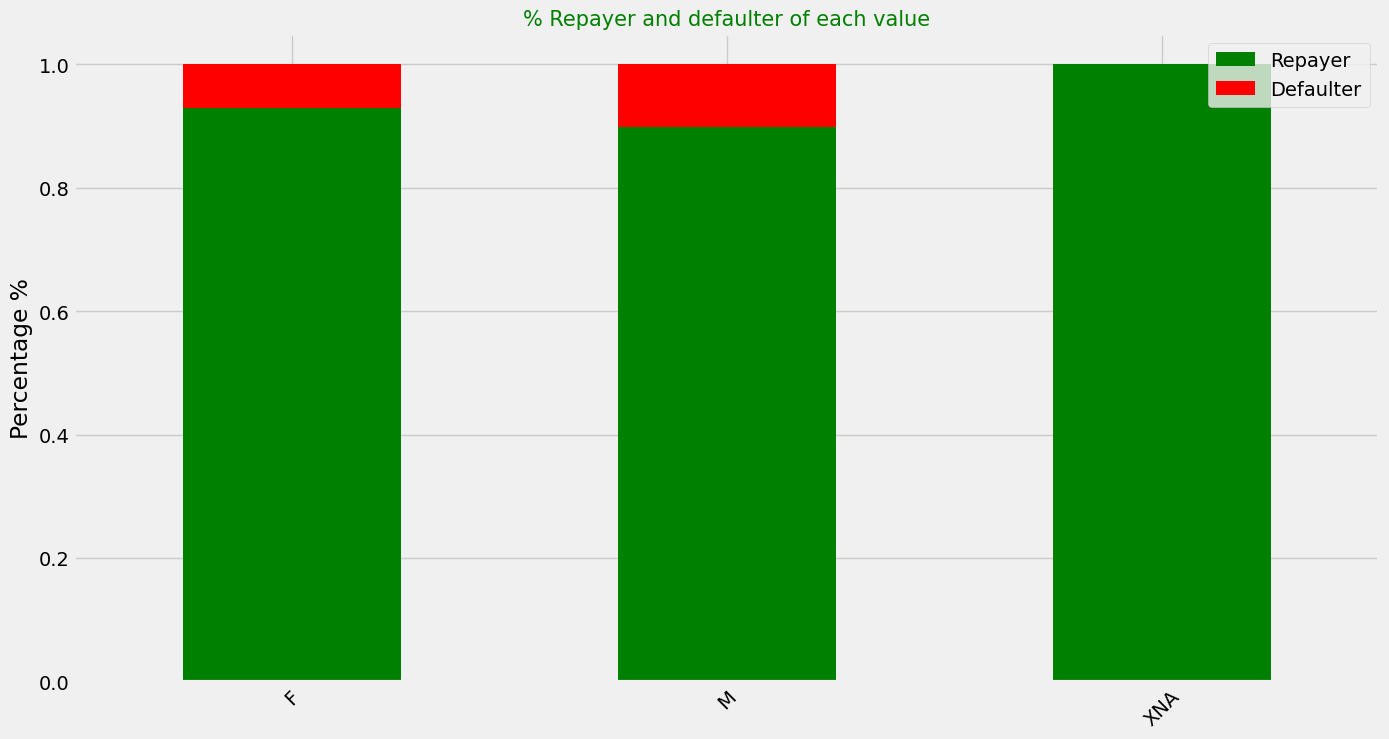

In [216]:
univariate_categorical('CODE_GENDER')

INSIGHT:
- Number of Female Loan Applications is about double higher that of Male
- Male is at higher risk than Female 

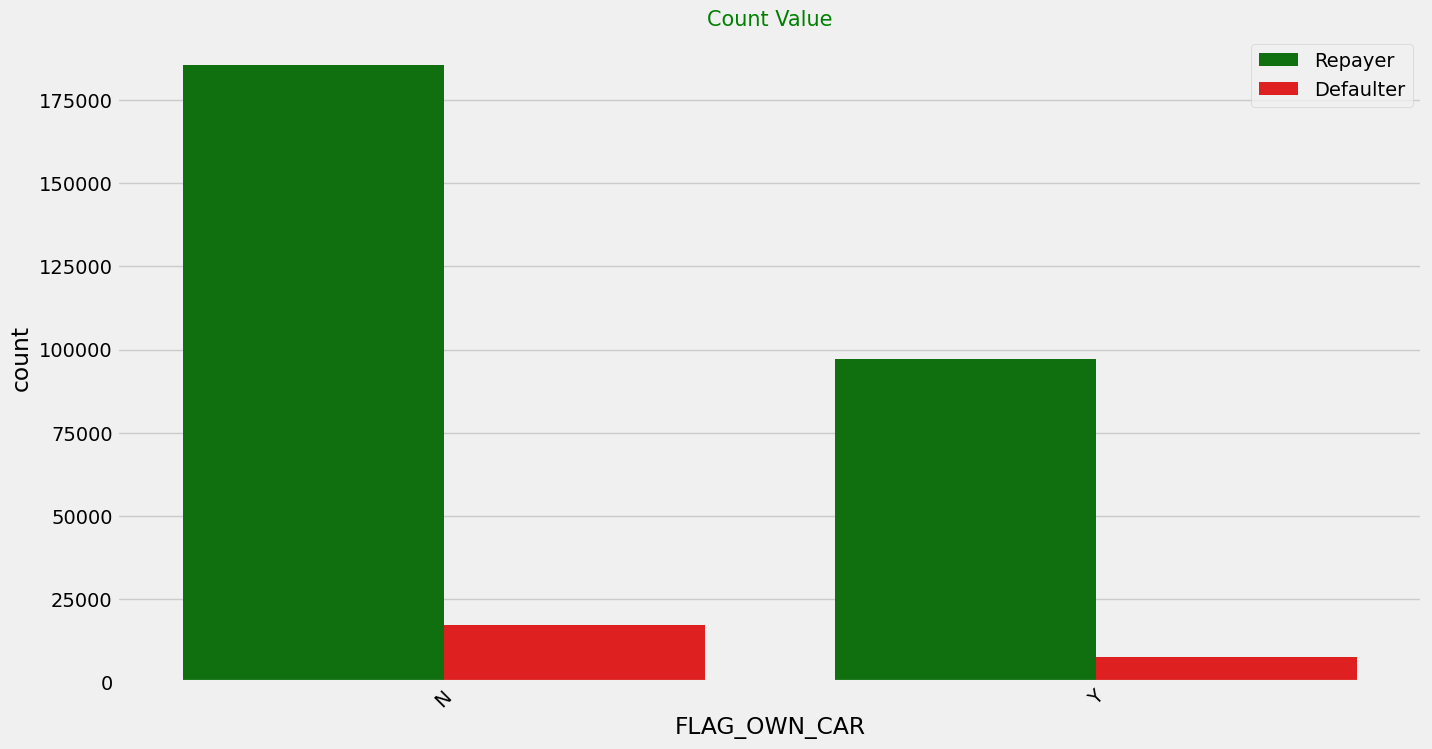

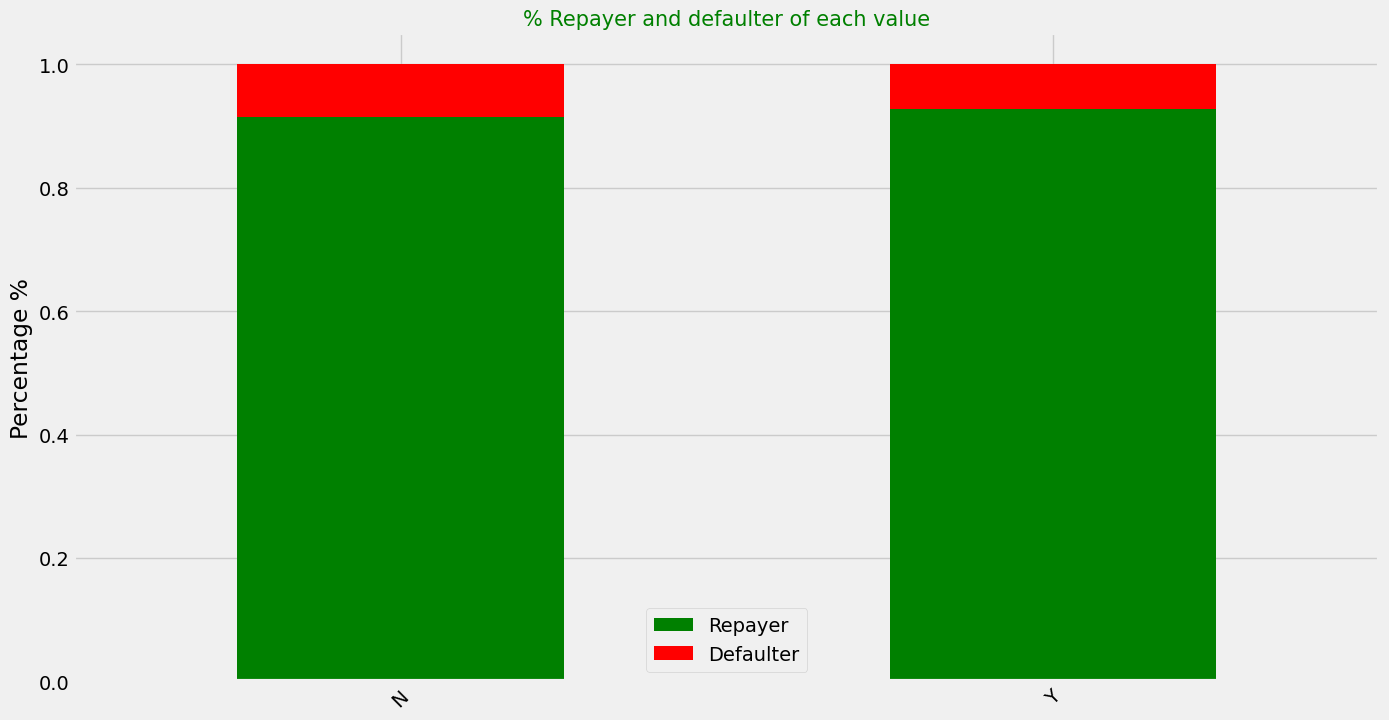

In [217]:
univariate_categorical('FLAG_OWN_CAR')

INSIGHT: Customers don't own a car will have tend to apply loan.

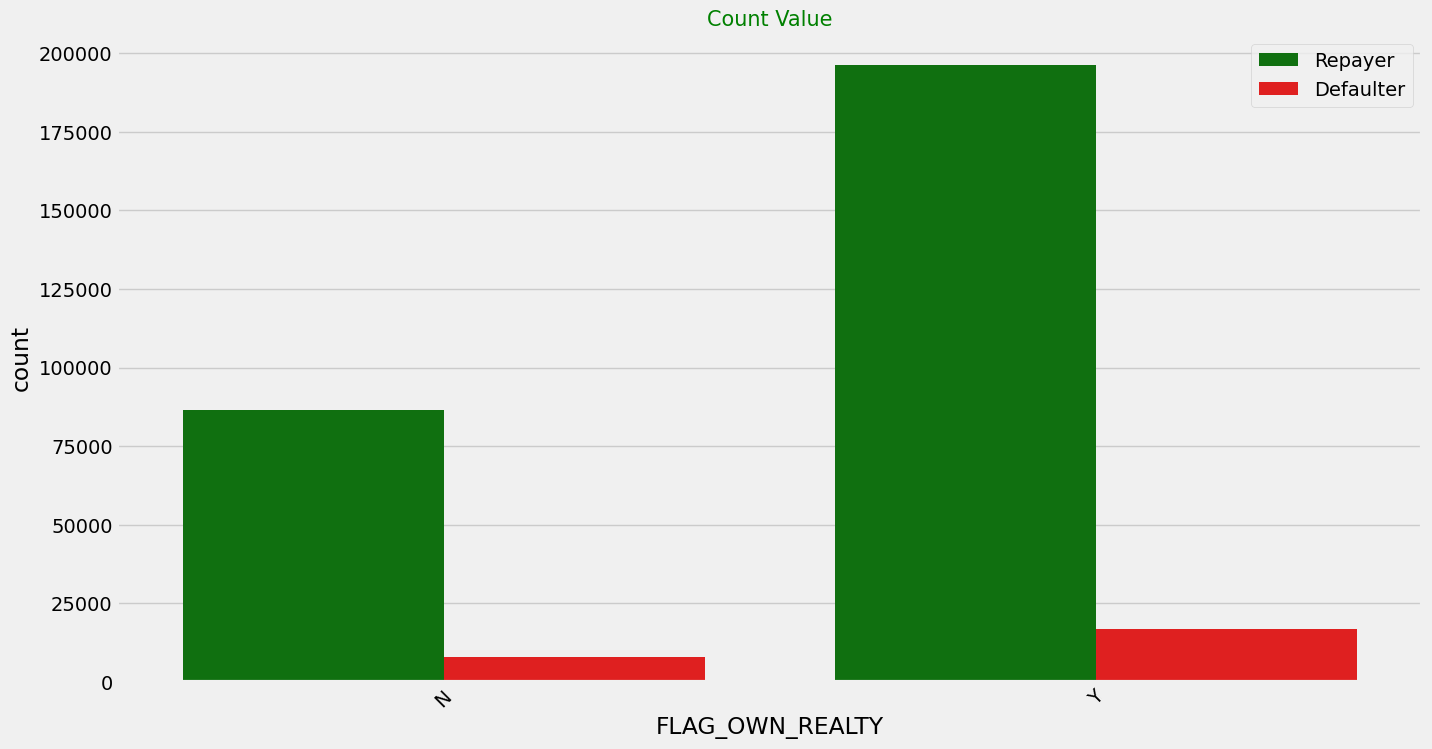

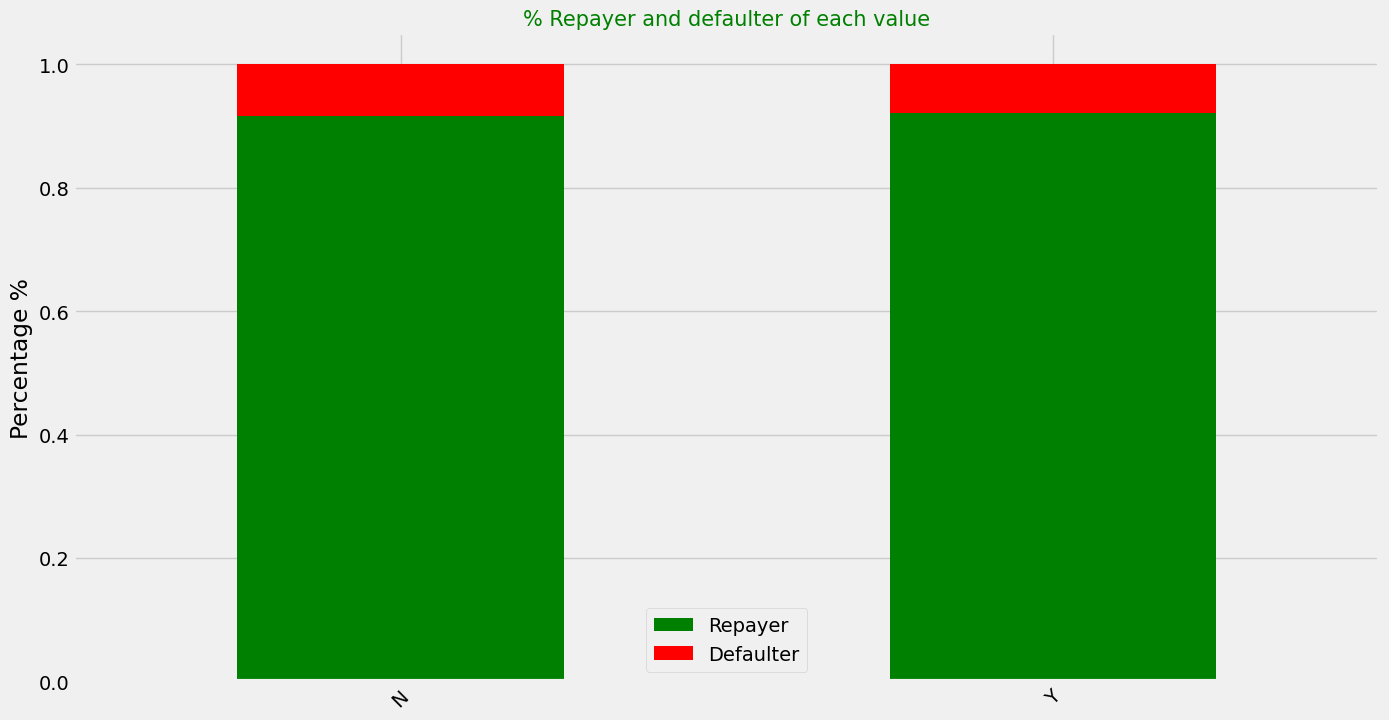

In [218]:
univariate_categorical('FLAG_OWN_REALTY')

INSIGHT: Number of customers owing real estate is more than that one doesn't.

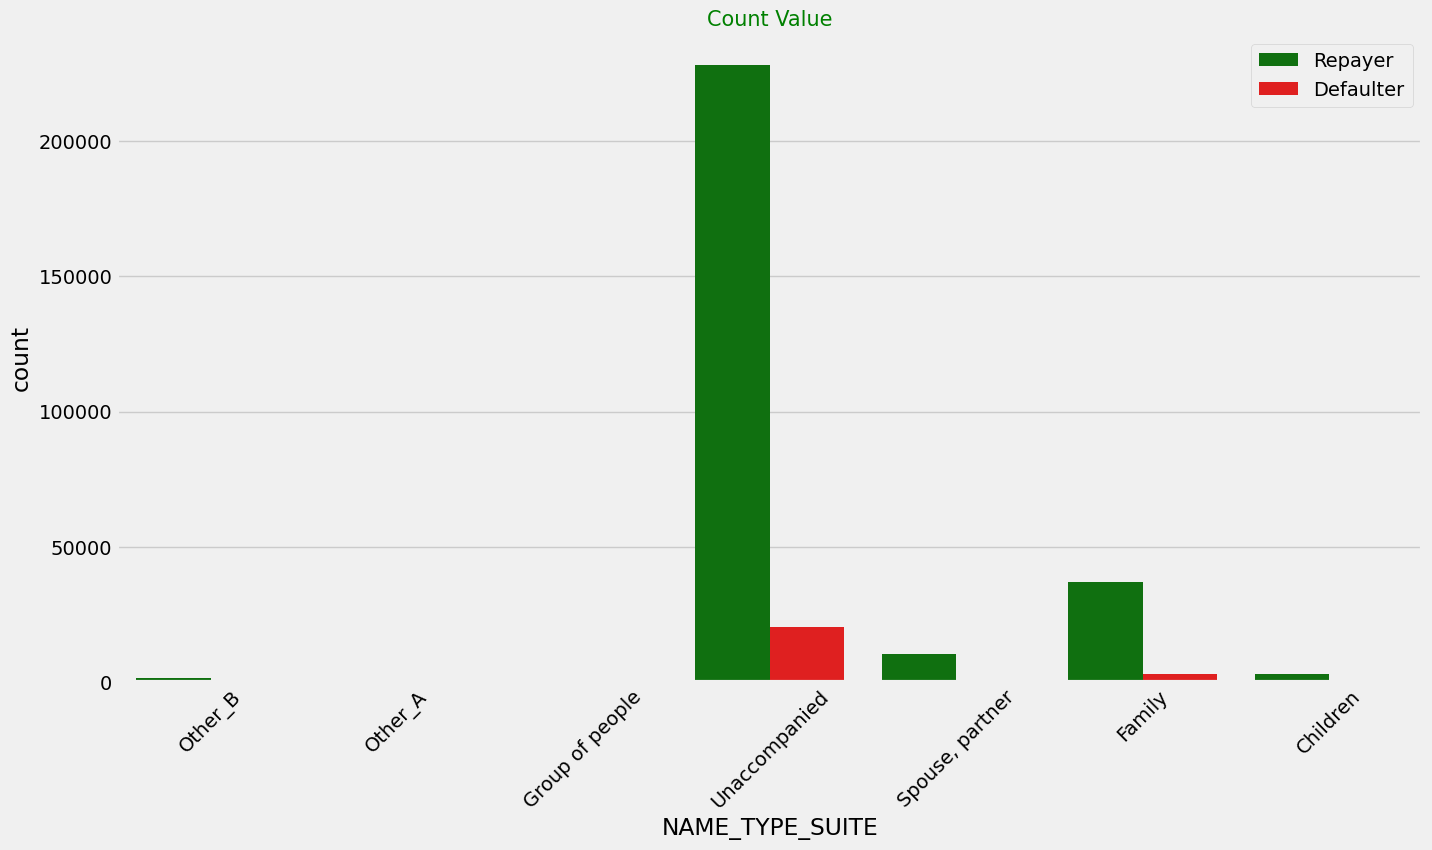

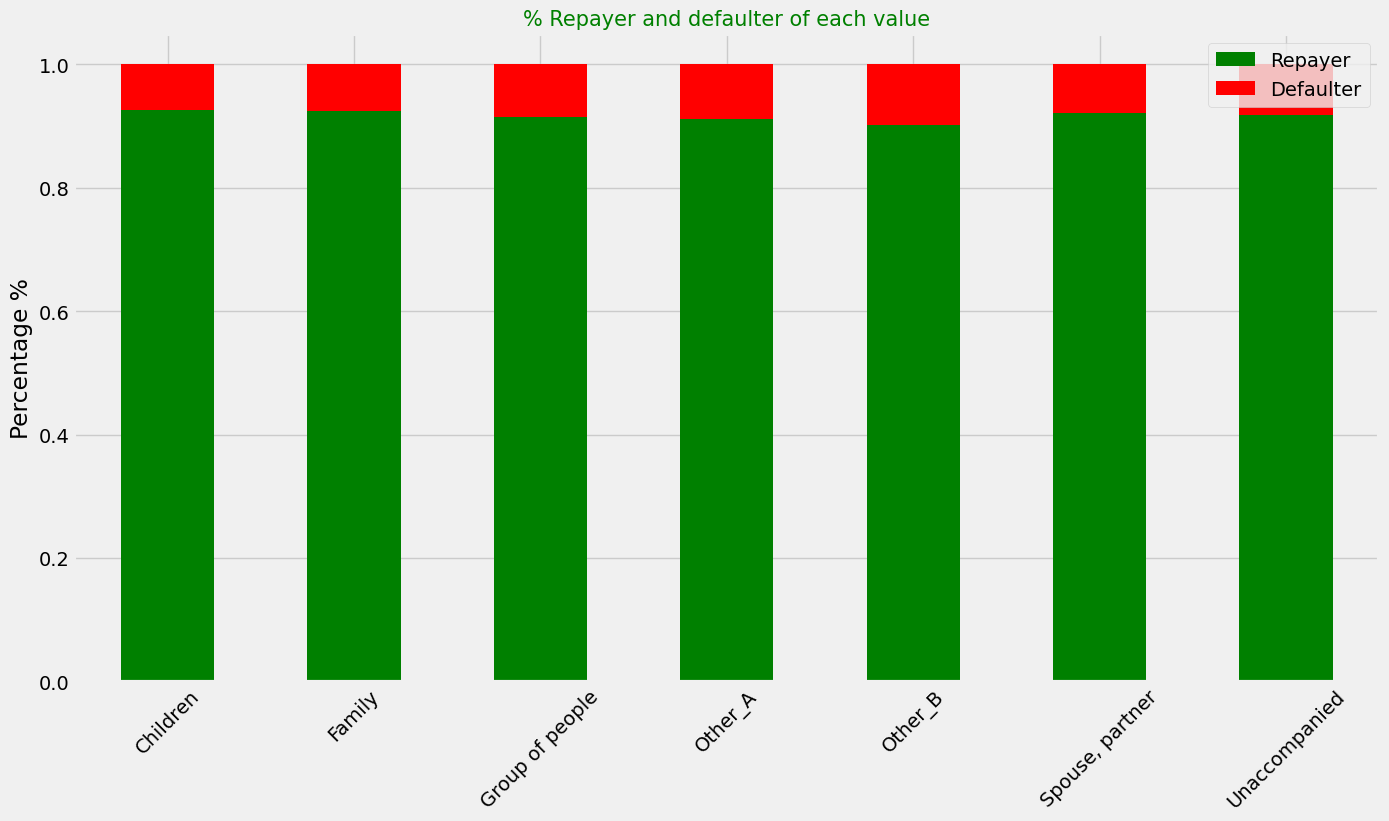

In [219]:
univariate_categorical('NAME_TYPE_SUITE')

INSIGHT: Customer usually apply loan alone

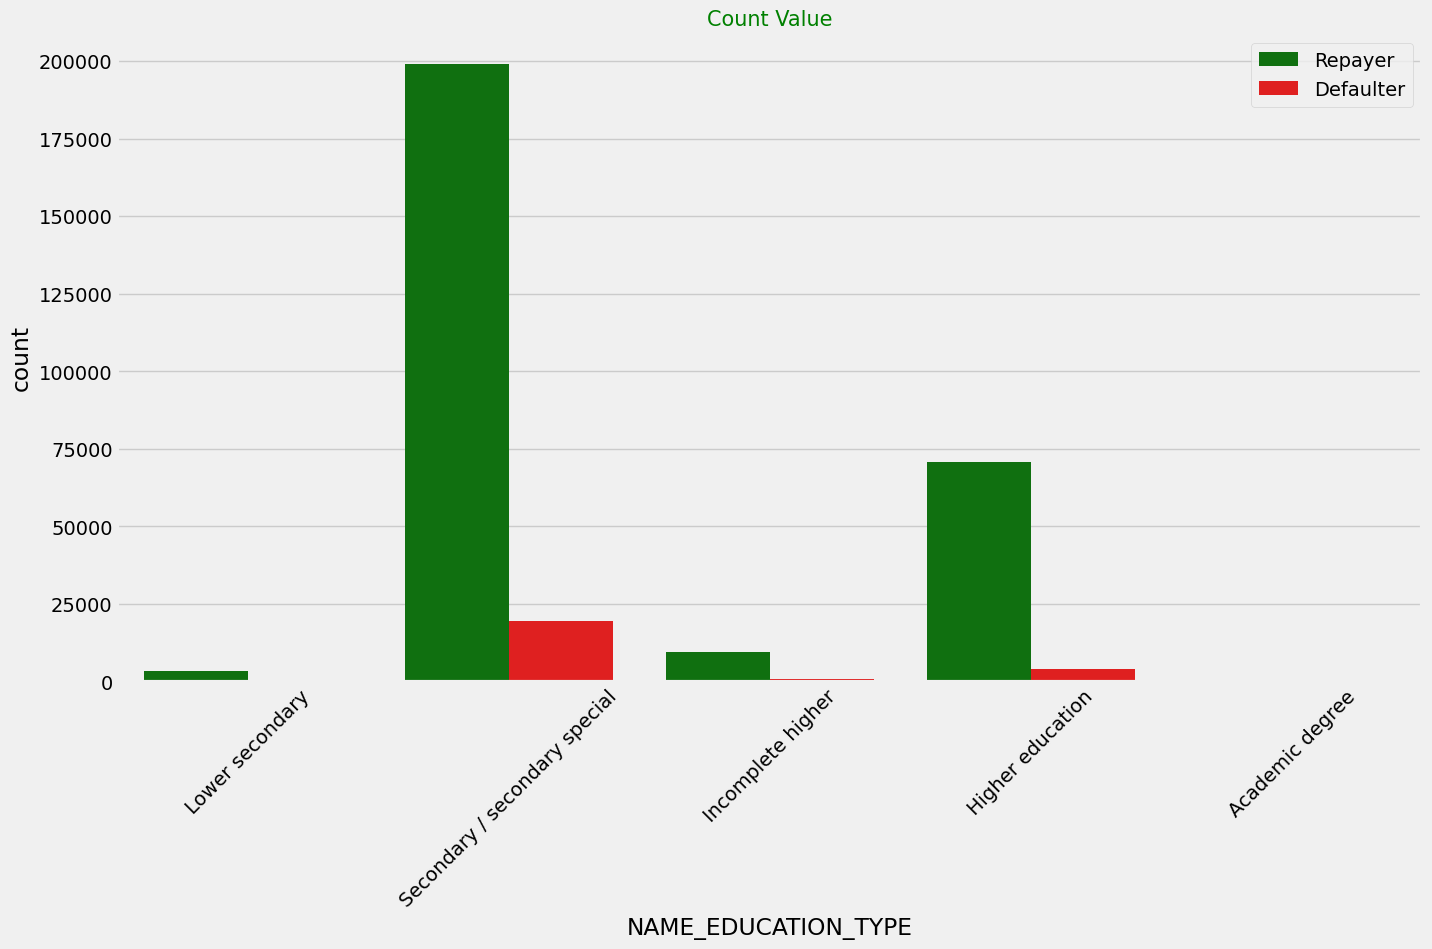

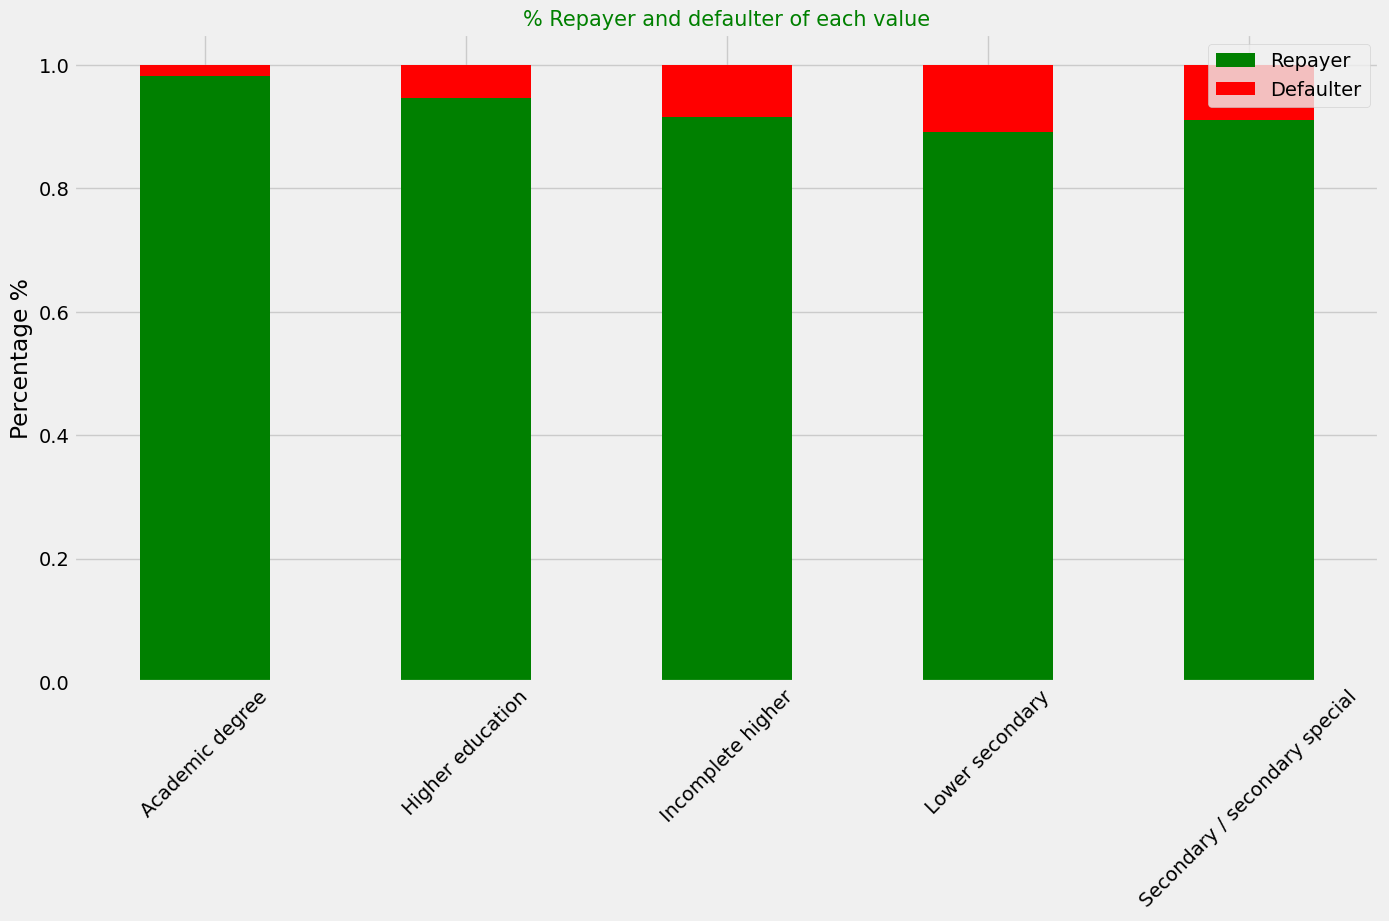

In [220]:
univariate_categorical('NAME_EDUCATION_TYPE')

INSIGHT: Most of loan applicants are secondary/ secondary special

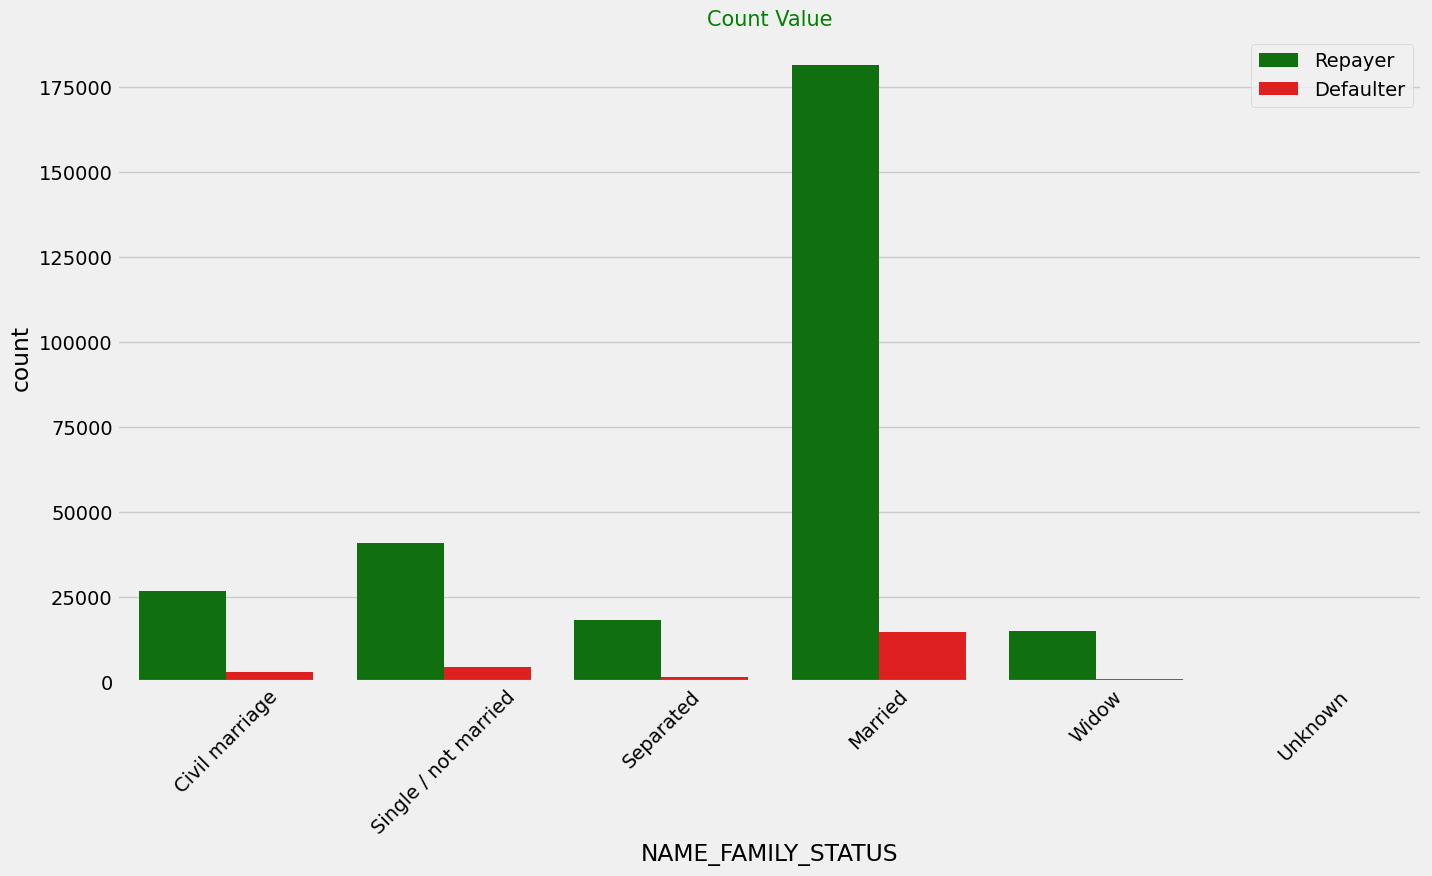

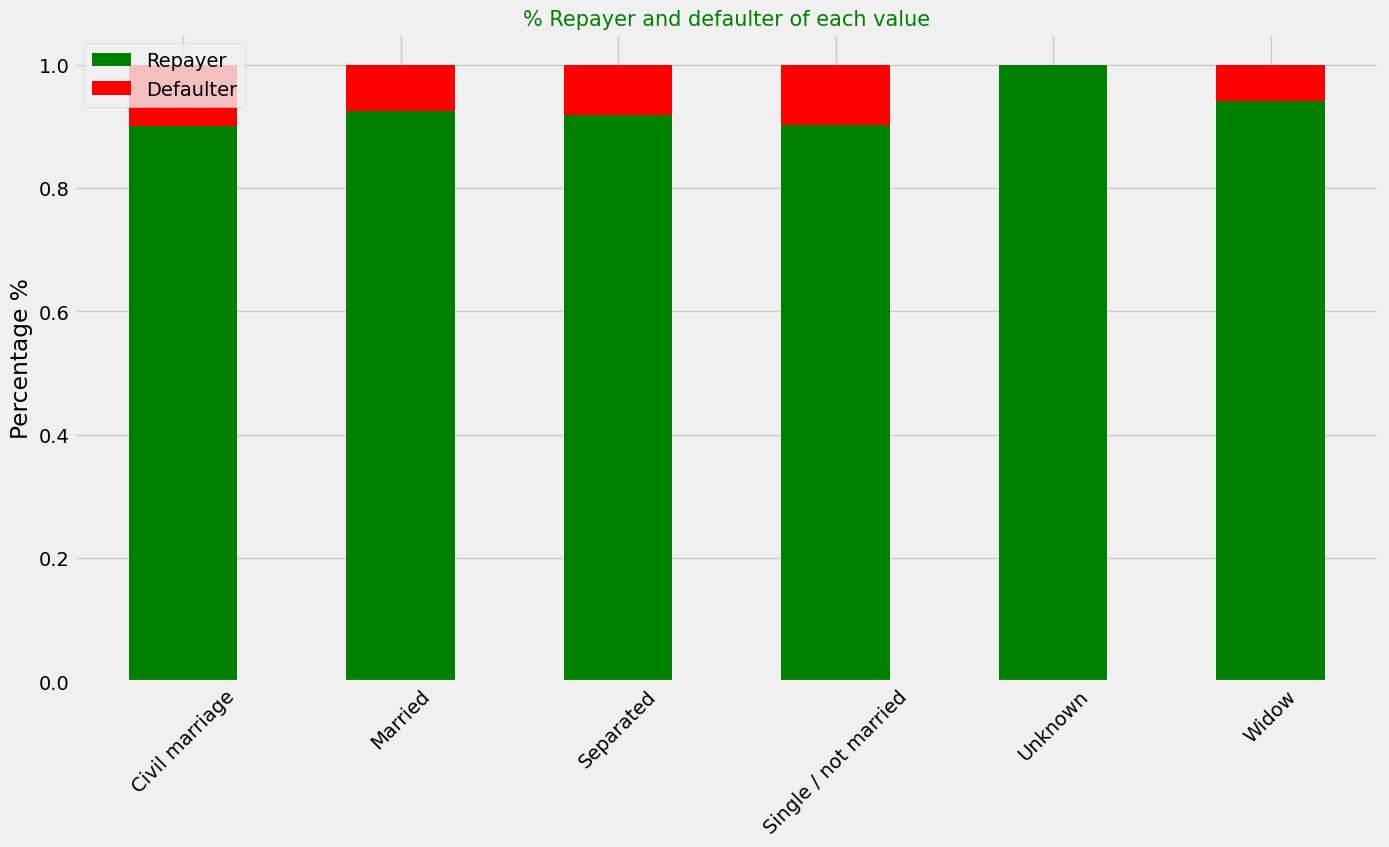

In [221]:
univariate_categorical('NAME_FAMILY_STATUS')

INSIGHT: Most of loan applicats are married

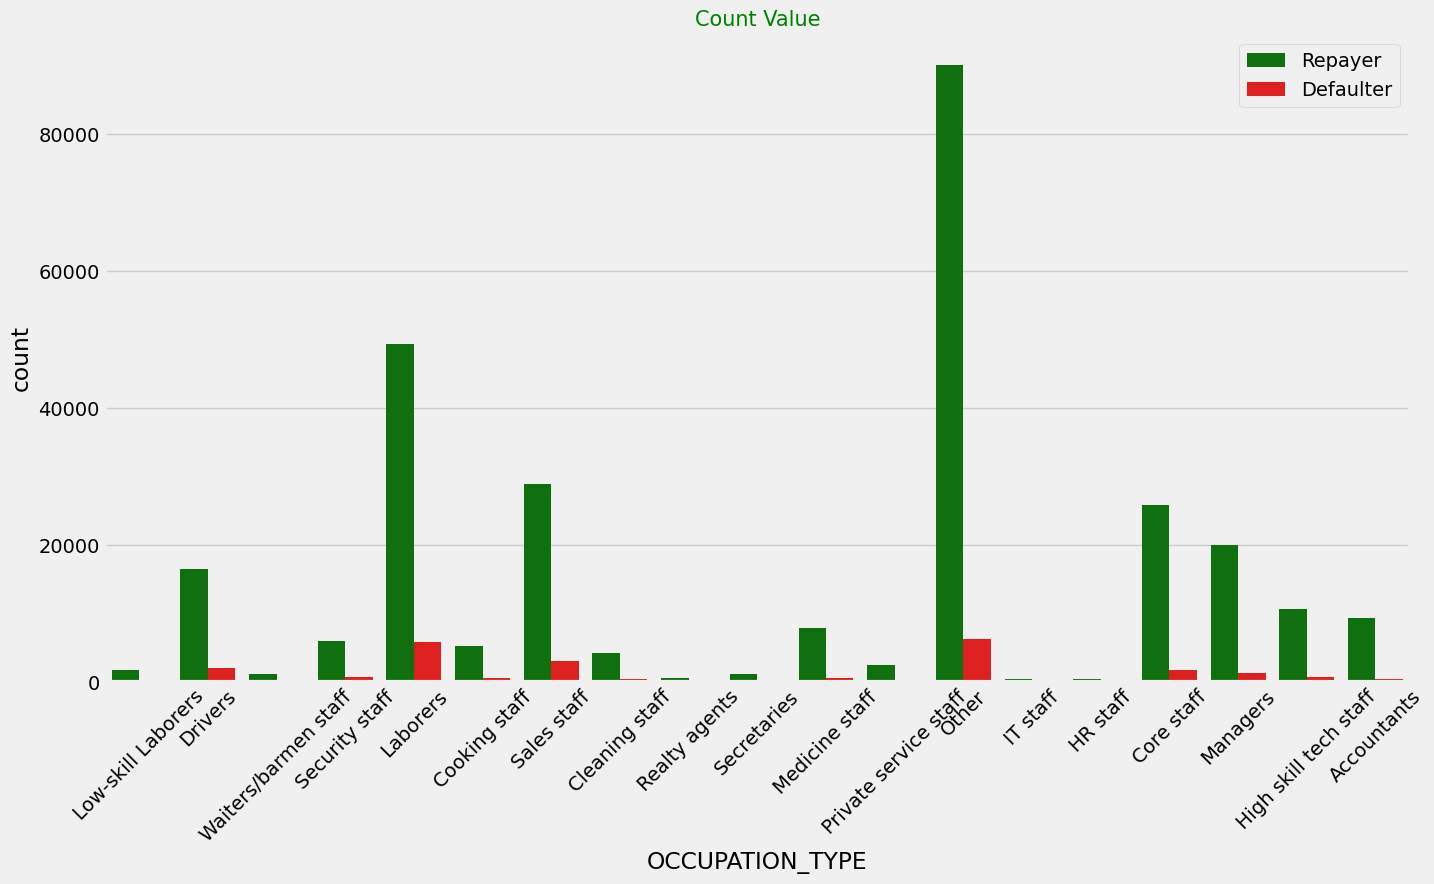

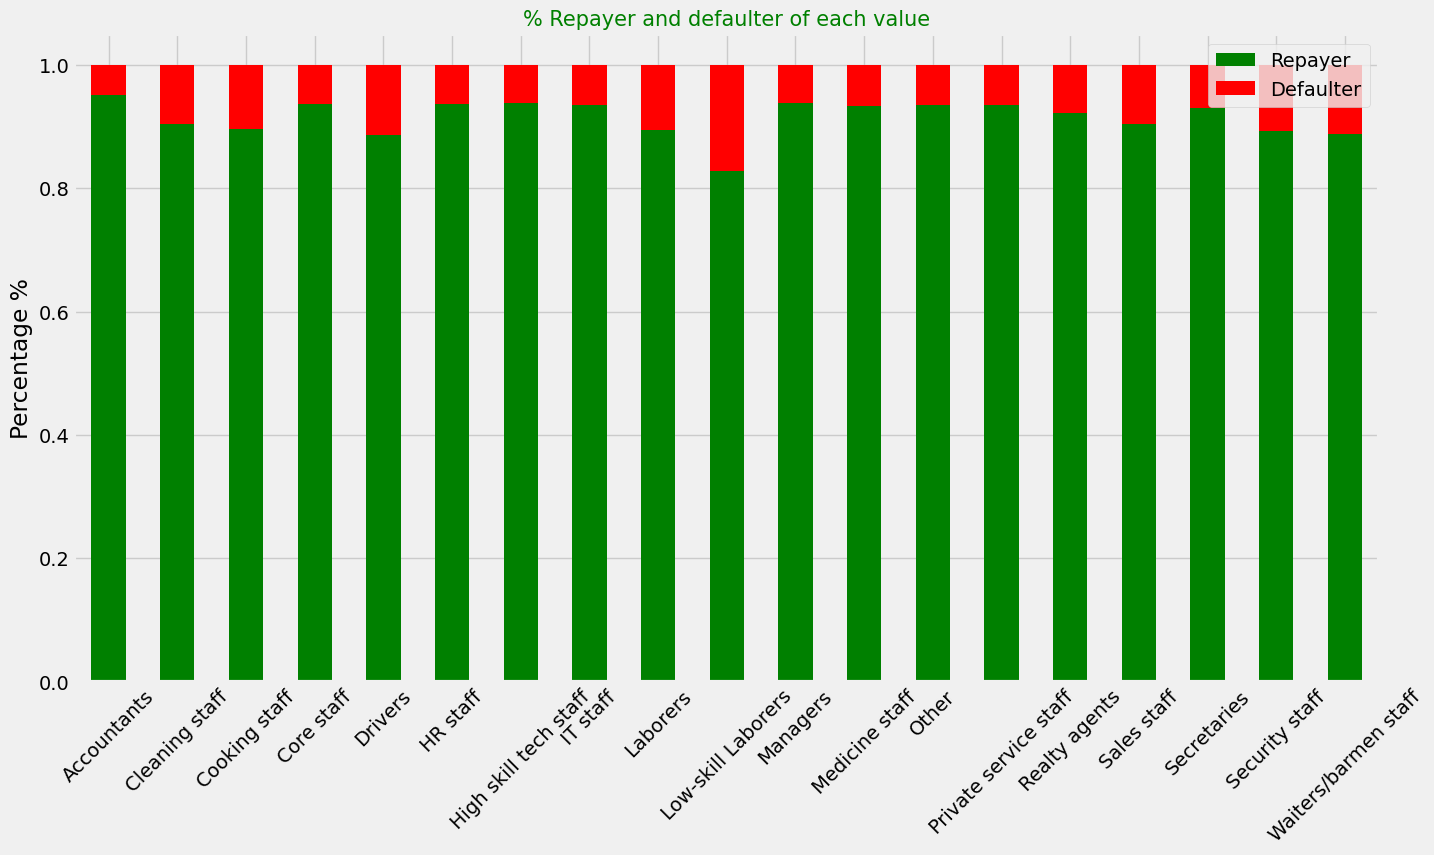

In [222]:
univariate_categorical('OCCUPATION_TYPE')

INSIGHT: Most of loan applicats are Low-skill Laborers

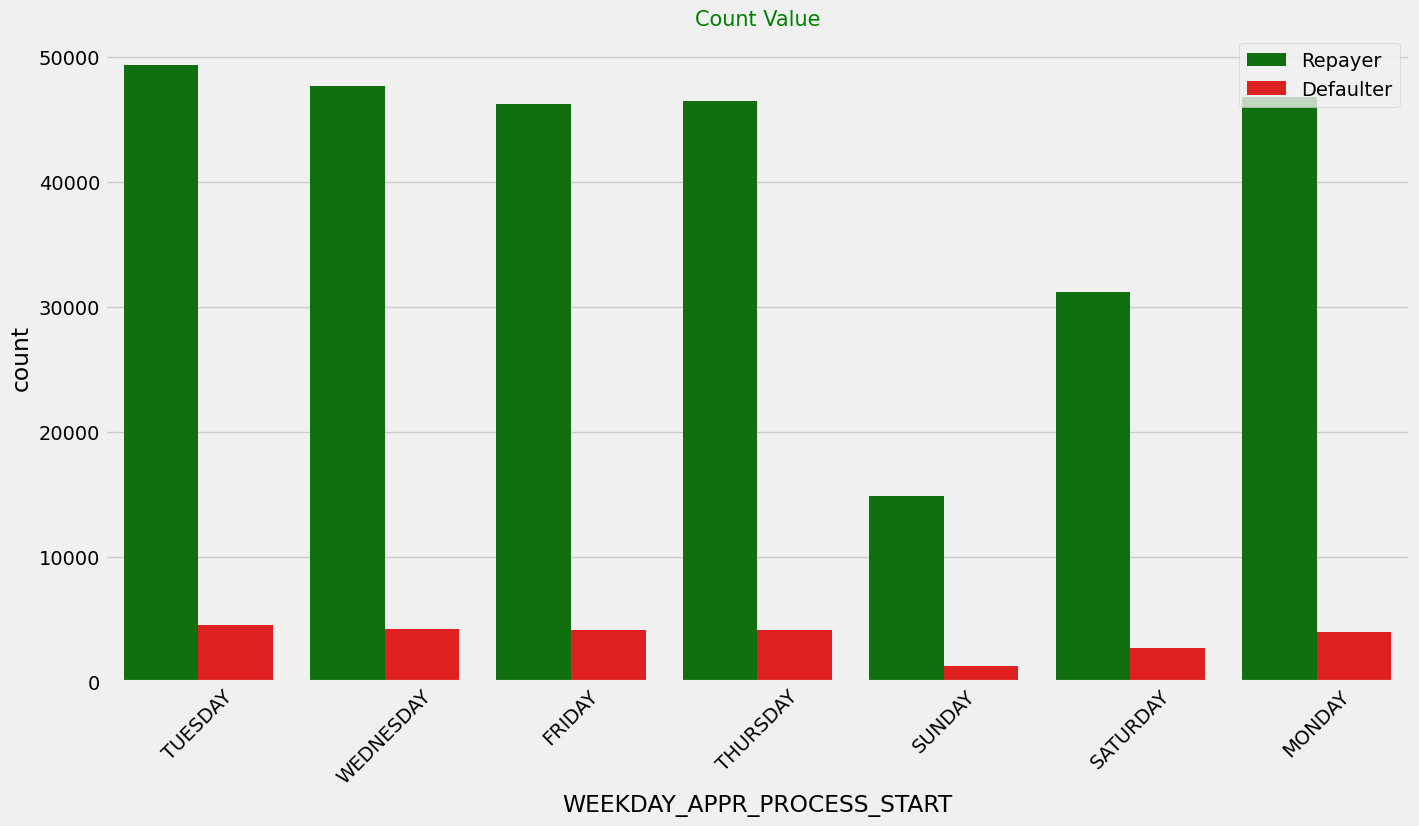

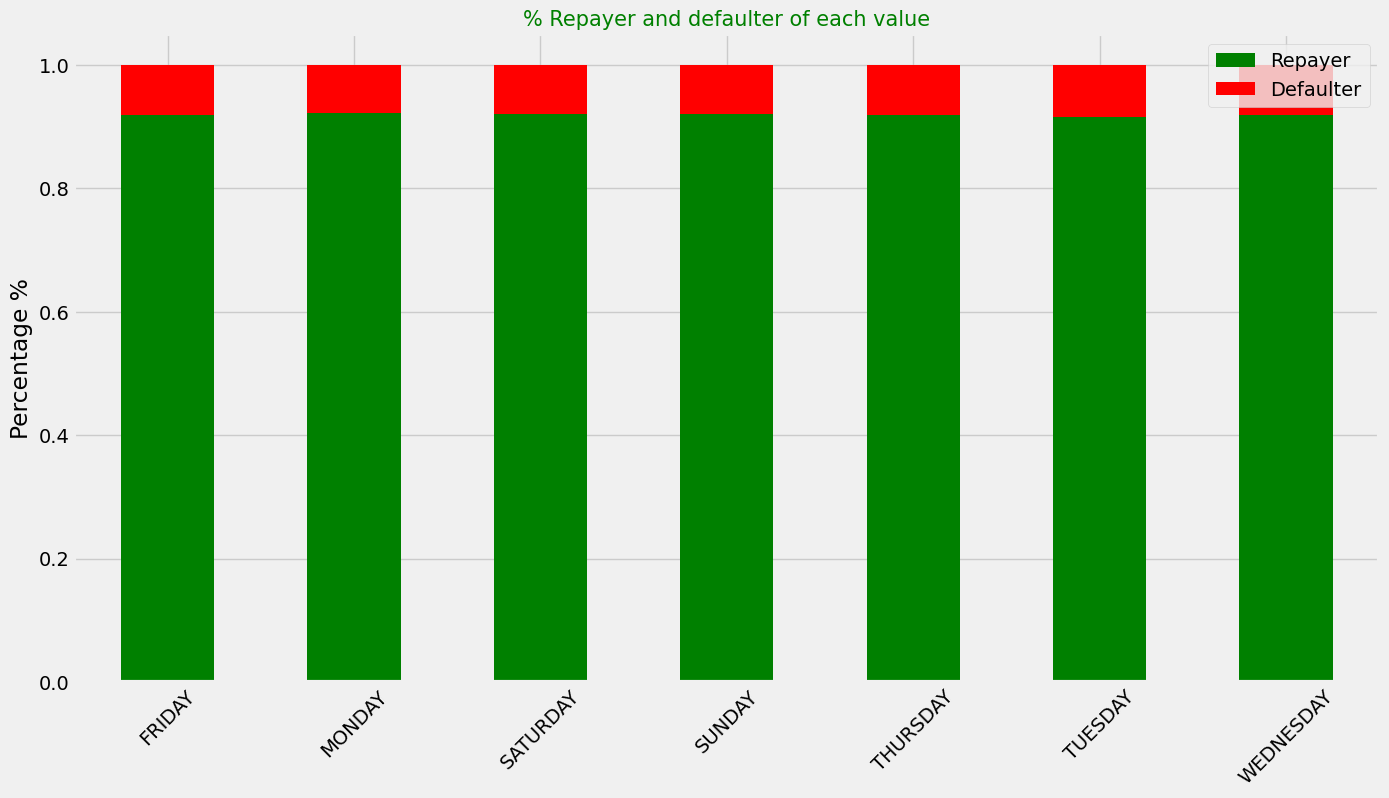

In [223]:
univariate_categorical('WEEKDAY_APPR_PROCESS_START')

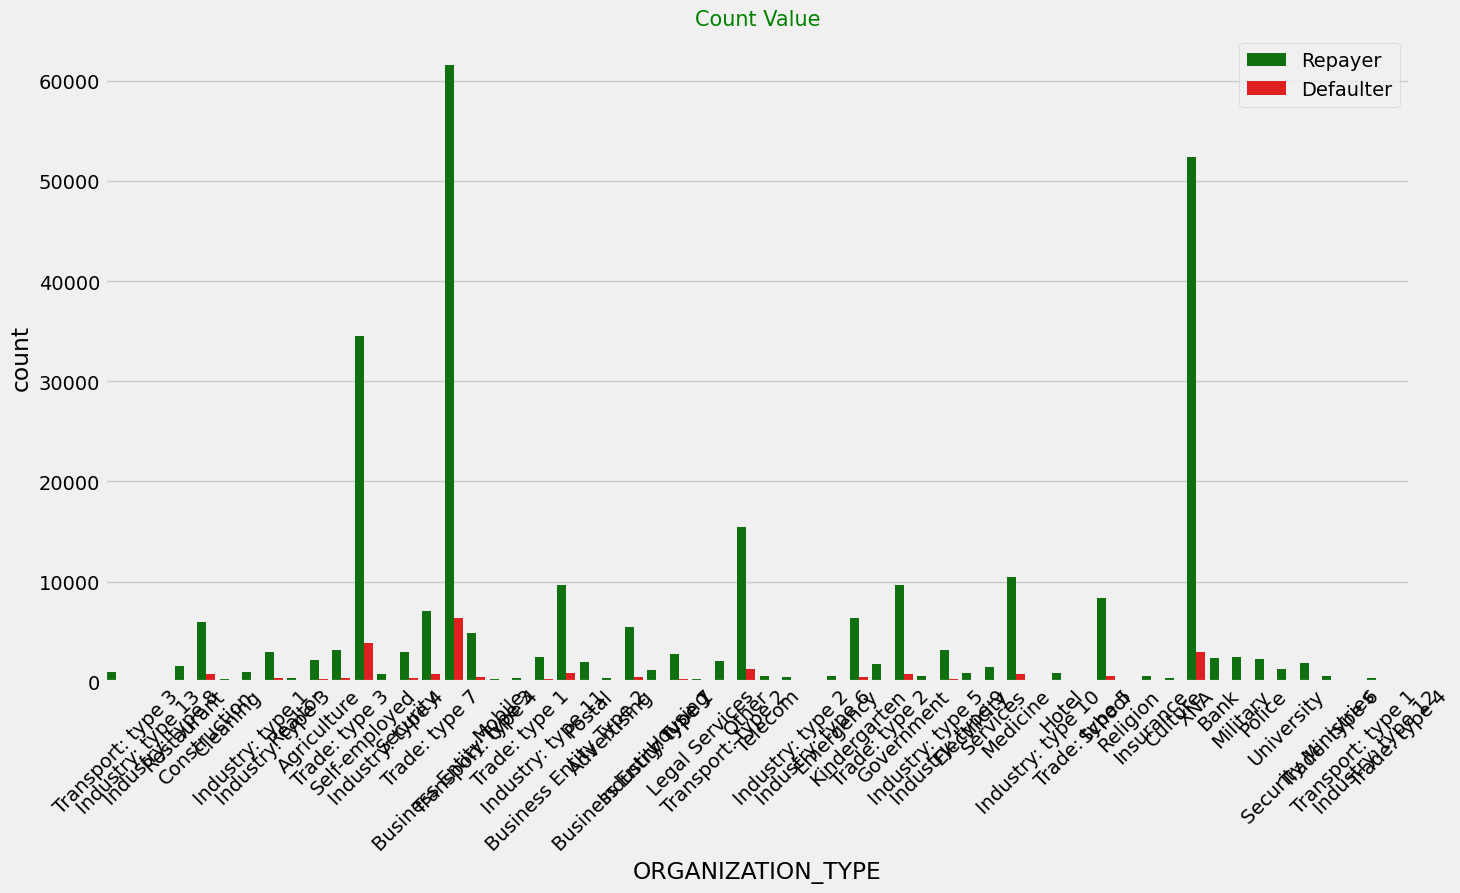

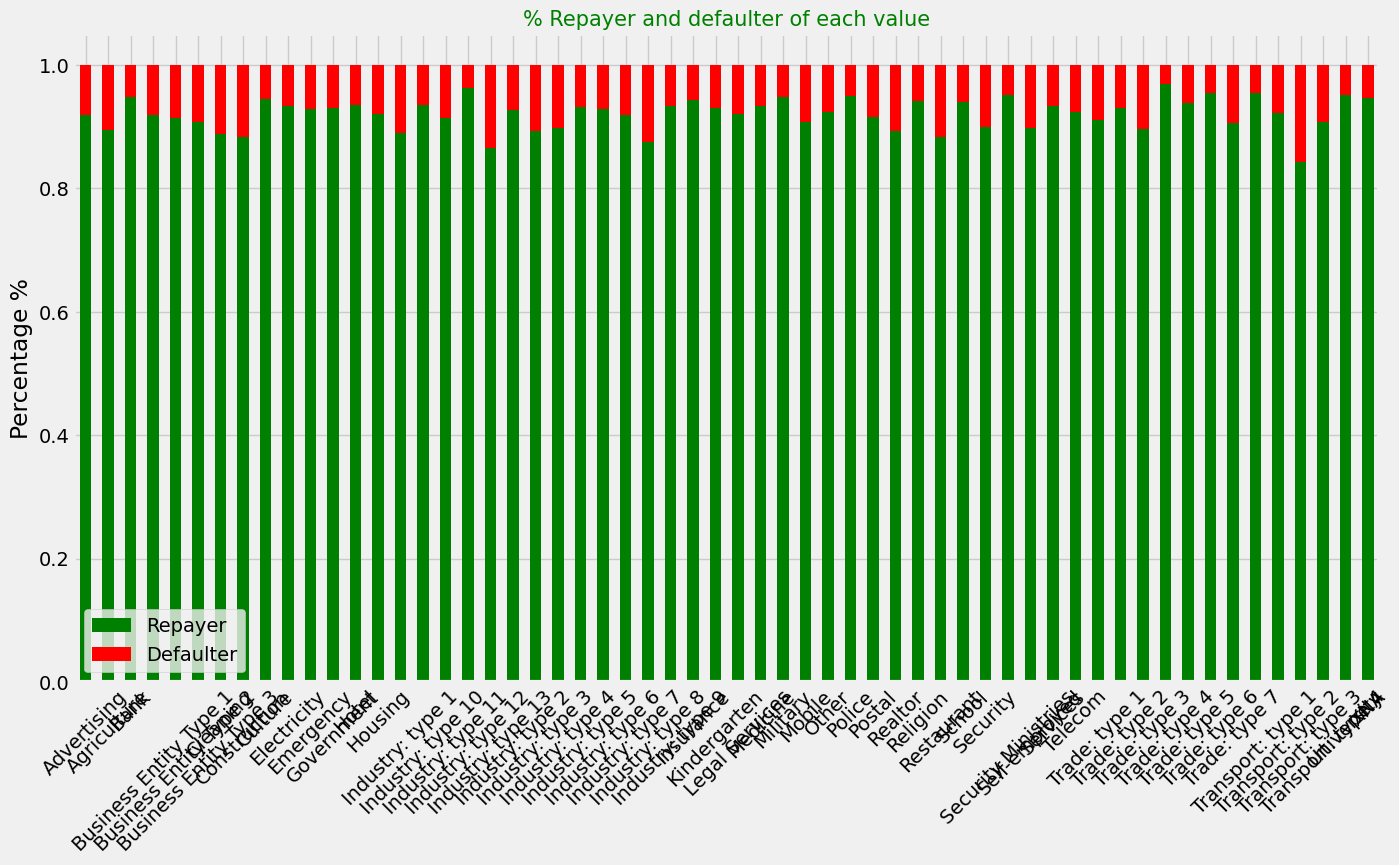

In [224]:
univariate_categorical('ORGANIZATION_TYPE')

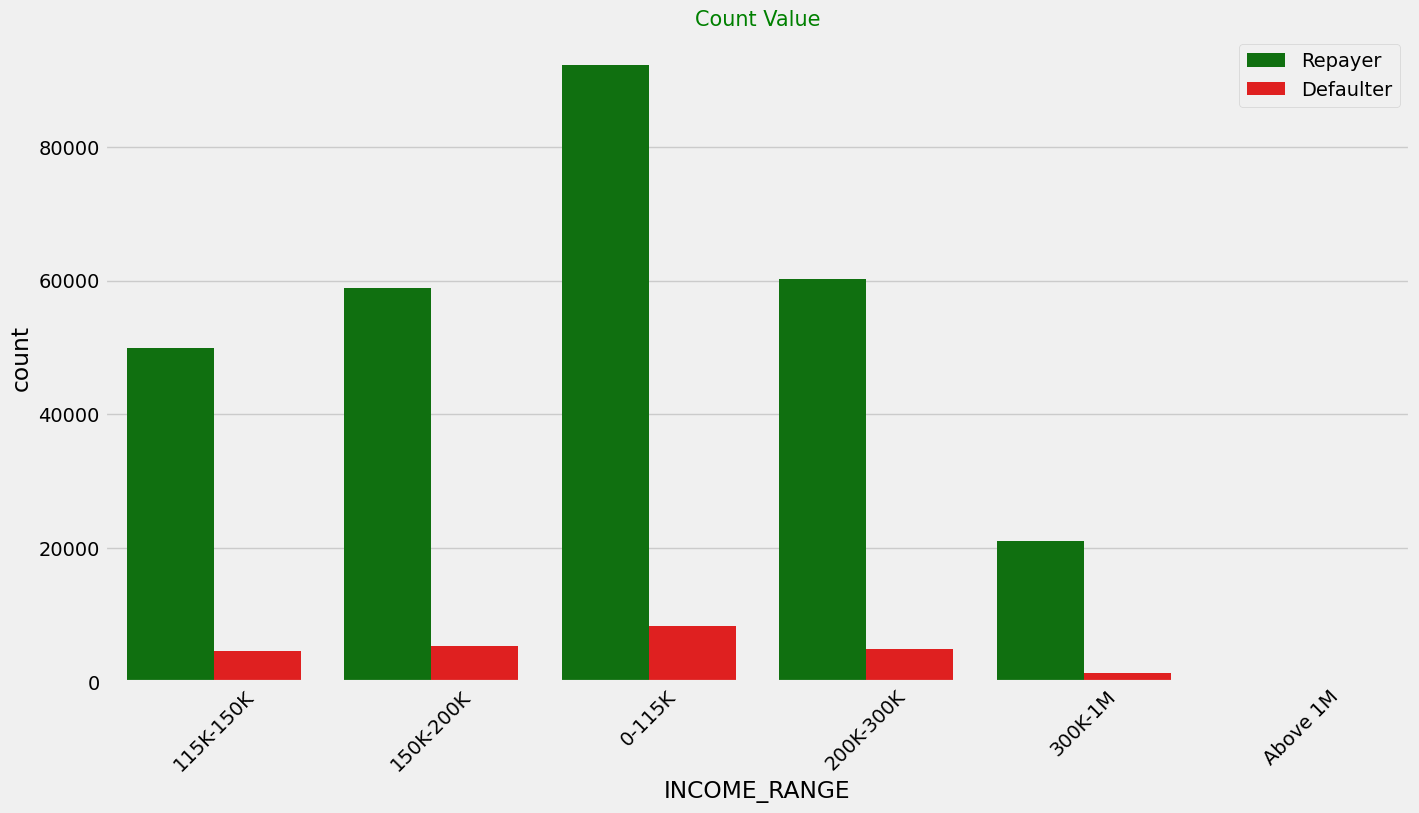

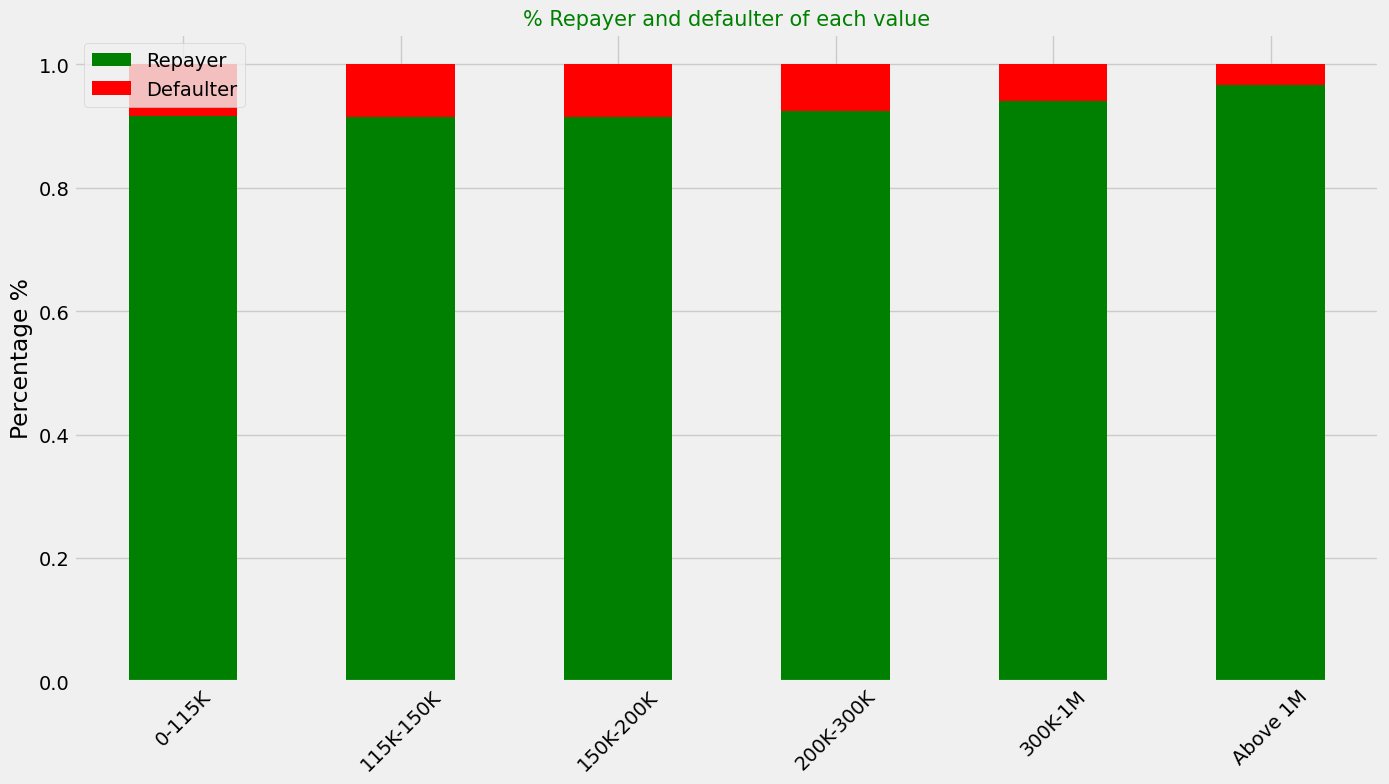

In [225]:
univariate_categorical('INCOME_RANGE')

INSIGHT: Most of customers have income below 300K

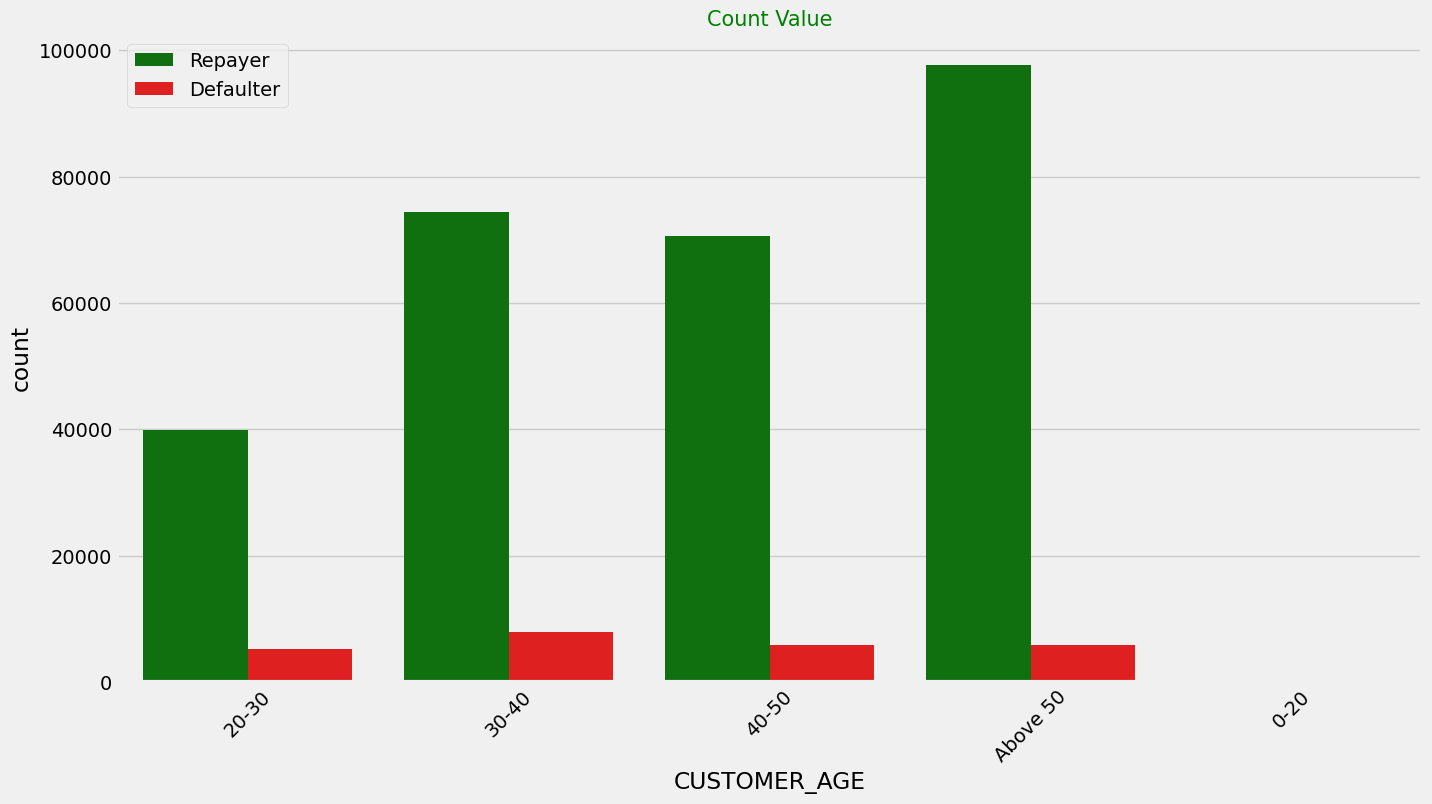

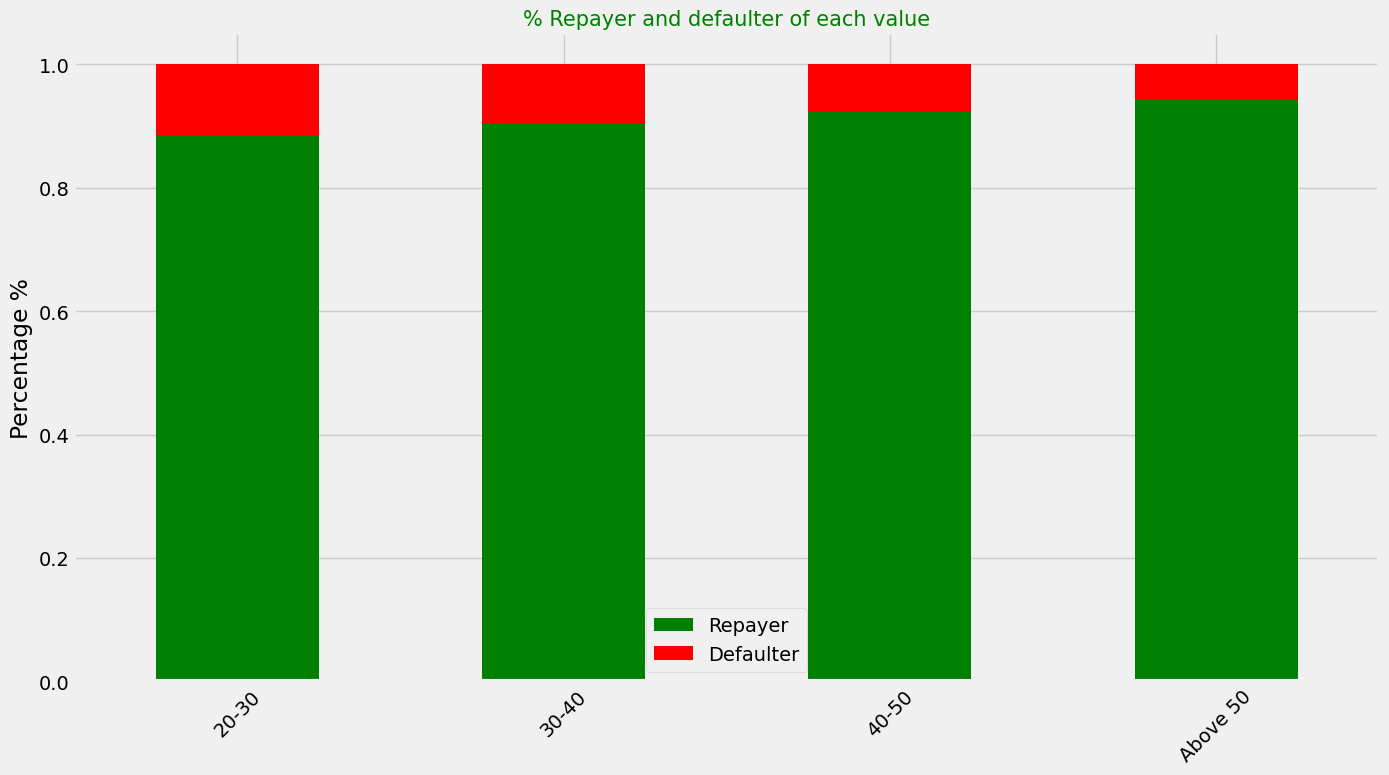

In [226]:
univariate_categorical('CUSTOMER_AGE')

INSIGHT: Most of customer's age is above 30

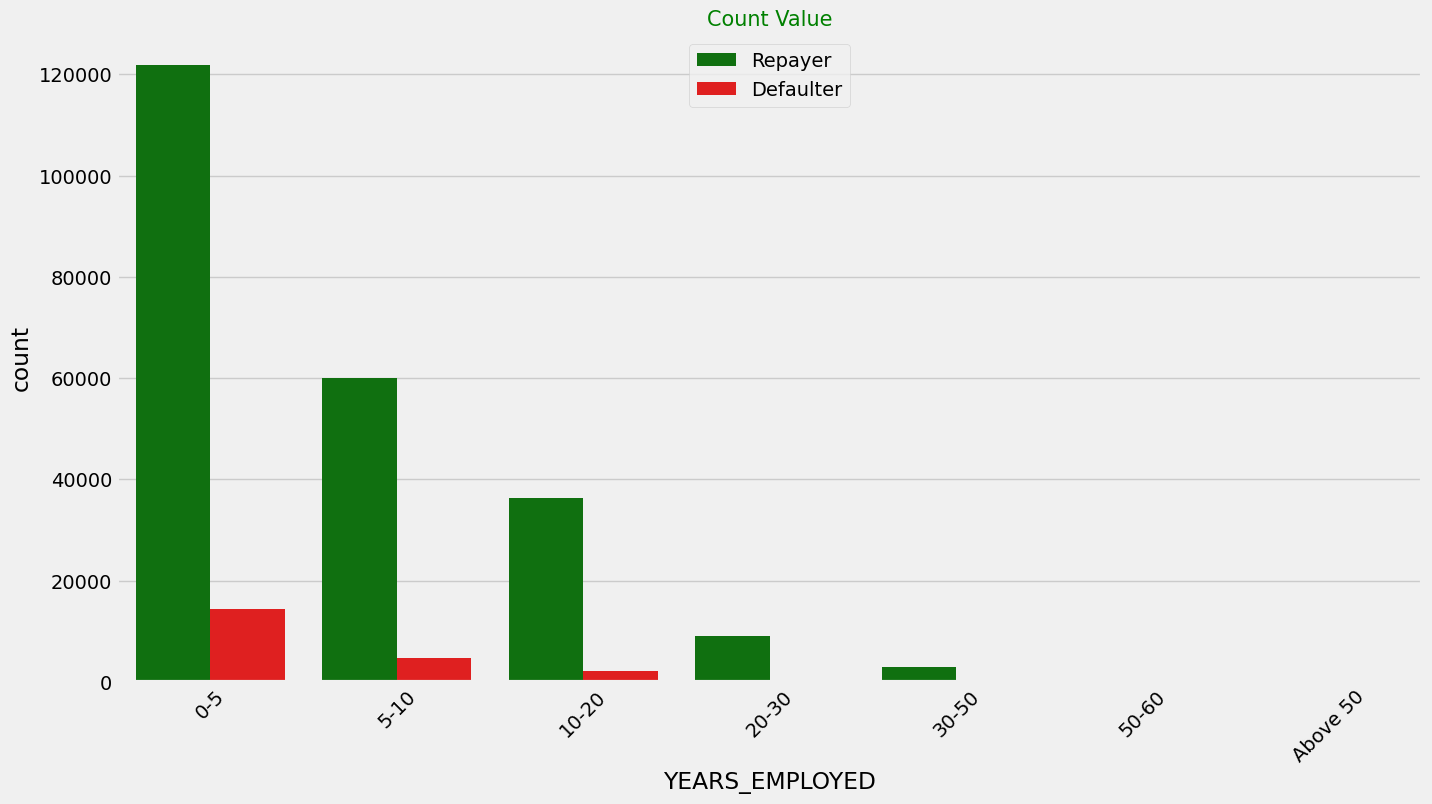

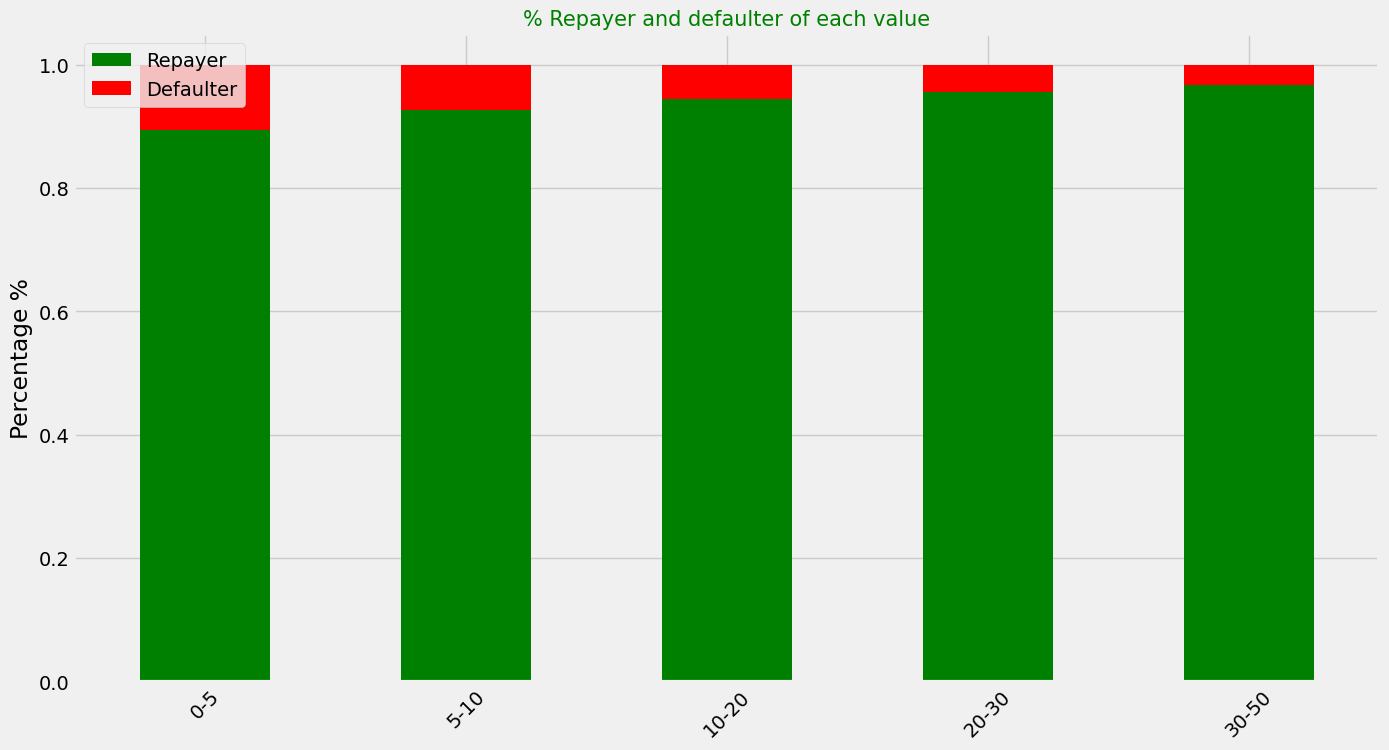

In [227]:
univariate_categorical('YEARS_EMPLOYED')

INSIGHT: The less experience a customer has, the more likely they apply for loan

INSIGHT: There are no differences in default value of each categorical columns 

Numeric Columns Analysis: using machine learning to build model predictive models

In [228]:
numeric_cols

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0           100002       1             0             2.025    4.065975  \
1           100003       0             0             2.700   12.935025   
2           100004       0             0             0.675    1.350000   
3           100006       0             0             1.350    3.126825   
4           100007       0             0             1.215    5.130000   
...            ...     ...           ...               ...         ...   
307506      456251       0             0             1.575    2.547000   
307507      456252       0             0             0.720    2.695500   
307508      456253       0             0             1.530    6.776640   
307509      456254       1             0             1.710    3.701070   
307510      456255       0             0             1.575    6.750000   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH   
0           24700.5         351000.0                    0.018801   25.920548  \
1           35698.5        1129500.0                    0.003541   45.931507   
2            6750.0         135000.0                    0.010032   52.180822   
3           29686.5         297000.0                    0.008019   52.068493   
4           21865.5         513000.0                    0.028663   54.608219   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561   25.553425   
307507      12001.5         225000.0                    0.025164   56.917808   
307508      29979.0         585000.0                    0.005002   41.002740   
307509      20205.0         319500.0                    0.005313   32.769863   
307510      49117.5         675000.0                    0.046220   46.180822   

        DAYS_EMPLOYED  ...  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE   
0                 637  ...                        0                       2.0  \
1                1188  ...                        0                       1.0   
2                 225  ...                        0                       0.0   
3                3039  ...                        0                       2.0   
4                3038  ...                        1                       0.0   
...               ...  ...                      ...                       ...   
307506            236  ...                        0                       0.0   
307507         365243  ...                        0                       0.0   
307508           7921  ...                        1                       6.0   
307509           4786  ...                        0                       0.0   
307510           1262  ...                        1                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE   
0                            2.0                       2.0  \
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       6.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE   
0                            2.0                  1134.0  \
1                            0.0                   828.0   
2                            0.0                   815.0   
3                            0.0                   617.0   
4                            0.0                  1106.0   
...                          ...                     ...   
307506              

In [229]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  float64
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  FLAG_MOBIL                   307511 non-null  int64  
 13 

In [230]:
numeric_cols.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL   
count  307511.000000  307511.000000  307511.000000     307511.000000  \
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE   
count  307511.000000  307511.000000     3.075110e+05  \
mean        5.990260   27107.516051     5.379095e+05   
std         4.024908   14494.443757     3.696338e+05   
min         0.450000       0.000000     0.000000e+00   
25%         2.700000   16524.000000     2.385000e+05   
50%         5.135310   24903.000000     4.500000e+05   
75%         8.086500   34596.000000     6.795000e+05   
max        40.500000  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...   
count               307511.000000  307511.000000  307511.000000  ...  \
mean                     0.020868      43.936973   67724.742149  ...   
std                      0.013831      11.956133  139443.751806  ...   
min                      0.000290      20.517808       0.000000  ...   
25%                      0.010006      34.008219     933.000000  ...   
50%                      0.018850      43.150685    2219.000000  ...   
75%                      0.028663      53.923288    5707.000000  ...   
max                      0.072508      69.120548  365243.000000  ...   

       LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE   
count            307511.000000             307511.000000  \
mean                  0.179555                  1.417523   
std                   0.383817                  2.398395   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  2.000000   
max                   1.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE   
count             307511.000000             307511.000000  \
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE   
count             307511.000000           307511.000000  \
mean                   0.099717              962.855657   
std                    0.361735              826.808966   
min                    0.000000                0.000000   
25%                    0.000000              274.000000   
50%                    0.000000              757.000000   
75%                    0.000000             1570.000000   
max                   24.000000             4292.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY   
count               307511.000000              307511.000000  \
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       

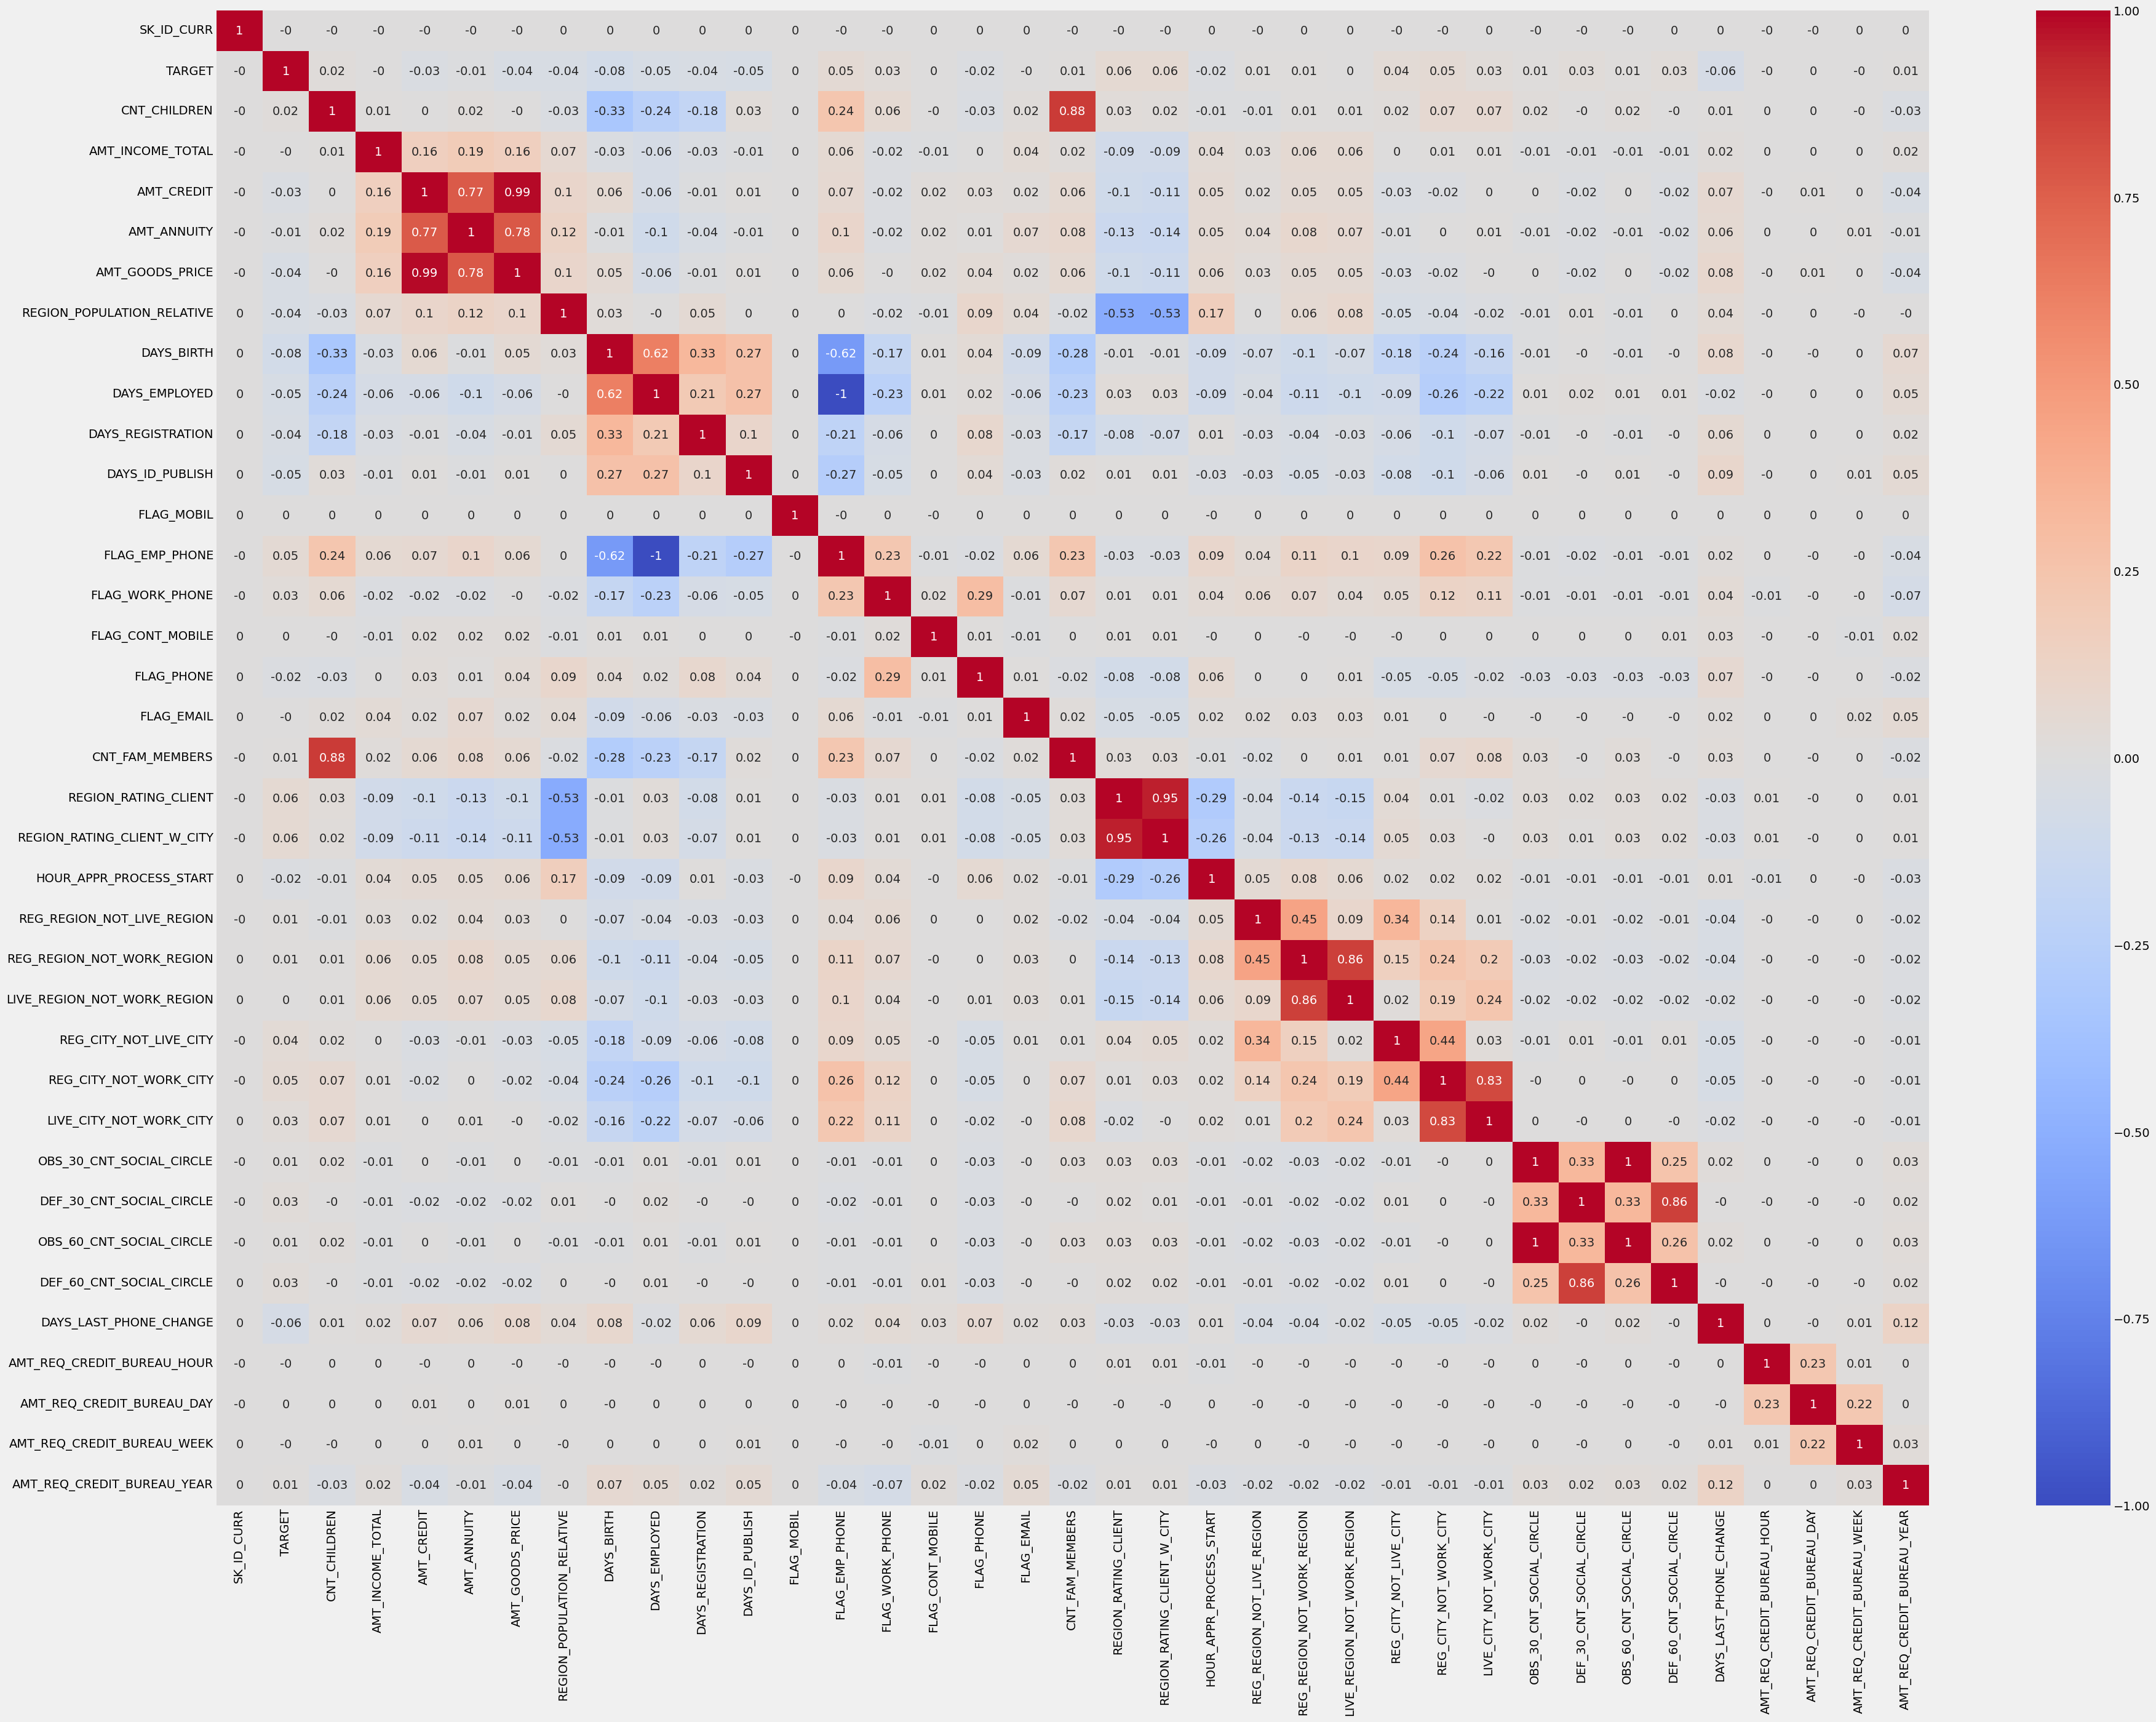

In [231]:
#check correlation of numeric columns with TARGET
corr_table = numeric_cols.corr()
rounded_corr_table = corr_table.round(2)
fig, ax = plt.subplots(figsize=(40, 30))
# plot the correlation table
sns.heatmap(rounded_corr_table, cmap='coolwarm', annot=True, center=0)

# show the plot
plt.show()

In [232]:
#Drop low correlation columns in numeric_cols
numeric_cols = numeric_cols.drop(columns =['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_WORK_REGION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'])

In [233]:
#check whether features's correlation > 0.03
correlated_features = set()  
correlation_matrix = numeric_cols.corr()  

for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
len(correlated_features)  
print (correlated_features)

{'LIVE_CITY_NOT_WORK_CITY', 'AMT_GOODS_PRICE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT_W_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'AMT_ANNUITY'}


In [234]:
correlated_features 

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DAYS_EMPLOYED',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY'}

In [235]:
numeric_cols_cor = numeric_cols[['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS','DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY']]

In [236]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   CNT_CHILDREN                 307511 non-null  int64  
 2   AMT_CREDIT                   307511 non-null  float64
 3   AMT_ANNUITY                  307511 non-null  float64
 4   AMT_GOODS_PRICE              307511 non-null  float64
 5   REGION_POPULATION_RELATIVE   307511 non-null  float64
 6   DAYS_BIRTH                   307511 non-null  float64
 7   DAYS_EMPLOYED                307511 non-null  int64  
 8   DAYS_REGISTRATION            307511 non-null  float64
 9   DAYS_ID_PUBLISH              307511 non-null  int64  
 10  FLAG_EMP_PHONE               307511 non-null  int64  
 11  FLAG_WORK_PHONE              307511 non-null  int64  
 12  FLAG_PHONE                   307511 non-null  int64  
 13 

Check correlation between categorical columns and target

In [237]:
categorical_cols['TARGET'] = df_app['TARGET']
#categorical_cols['TARGET'].replace(to_replace=1, value='True', inplace=True)
#categorical_cols['TARGET'].replace(to_replace=0,  value='False', inplace=True)

In [238]:
categorical_cols

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
0              Cash loans           M            N               Y  \
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0        Unaccompanied               Working  Secondary / secondary special  \
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE   
0       Single / not married  House / apartment        Laborers  \
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment           Other   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE INCOME_RANGE   
0                       WEDNESDAY  Business Entity Type 3    200K-300K  \
1                          MONDAY                  School    200K-300K   
2                          MONDAY              Government       0-115K   
3                       WEDNESDAY  Business Entity Type 3    115K-150K   
4                        THURSDAY                Religion    115K-150K   
...                           ...                     ...          ...   
307506                   THURSDAY                Services    150K-200K   
307507                     MONDAY                     XNA       0-115K   
307508                   THURSDAY                  School    150K-200K   
307509                  WEDNESDAY  Business Entity Type 1    150K-200K   
307510                   THURSDAY  Business Entity Type 3    150K-200K   

       CREDIT_RANK CUSTOMER_AGE YEARS_EMPLOYED  TARGET  
0         300-500K        20-30            0-5       1  
1         Above 1M        40-50            0-5       0  
2           0-300K     Above 50            0-5       0  
3         300-500K     Above 50           5-10       0  
4        500K-800K     Above 50           5-10       0  
...            ...          ...            ...     ...  
307506      0-300K        20-30            0-5       0  
307507      0-300K     Above 50            NaN       0  
307508   5

In [239]:
categorical_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'INCOME_RANGE',
       'CREDIT_RANK', 'CUSTOMER_AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [240]:
categorical_cols_2000 = categorical_cols[:2000]

In [241]:
#Check correlation between categorical columns and target by Chi-Square: for p_value < 0.05, variables have correlation.
#create small sample with 2000 line of categorical columns records to check chi-square (p-value)
from scipy.stats import chi2_contingency
# Perform chi-square test between the target column and other columns
for column in categorical_cols.columns:
    if column != 'TARGET':
        contingency_table = pd.crosstab(categorical_cols_2000['TARGET'], categorical_cols_2000[column])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square test between {'TARGET'} and {column}:")
        print("Chi-Square Statistic:", chi2)
        print("p-value:", p_value)
        print("Degrees of Freedom:", dof)
        print("Expected Frequencies:\n", expected)
        print()

Chi-Square test between TARGET and NAME_CONTRACT_TYPE:
Chi-Square Statistic: 0.7435635282089413
p-value: 0.3885217387685931
Degrees of Freedom: 1
Expected Frequencies:
 [[1669.5  185.5]
 [ 130.5   14.5]]

Chi-Square test between TARGET and CODE_GENDER:
Chi-Square Statistic: 14.572162832446532
p-value: 0.00013489261775855992
Degrees of Freedom: 1
Expected Frequencies:
 [[1198.33  656.67]
 [  93.67   51.33]]

Chi-Square test between TARGET and FLAG_OWN_CAR:
Chi-Square Statistic: 1.9684830368763038
p-value: 0.1606089711362559
Degrees of Freedom: 1
Expected Frequencies:
 [[1212.2425  642.7575]
 [  94.7575   50.2425]]

Chi-Square test between TARGET and FLAG_OWN_REALTY:
Chi-Square Statistic: 0.23367550660807732
p-value: 0.6288117874015872
Degrees of Freedom: 1
Expected Frequencies:
 [[ 576.905 1278.095]
 [  45.095   99.905]]

Chi-Square test between TARGET and NAME_TYPE_SUITE:
Chi-Square Statistic: 3.6391686648225607
p-value: 0.7253712072062317
Degrees of Freedom: 6
Expected Frequencies:
 [

In [242]:
#drop columns with no correlation
categorical_cols = categorical_cols.drop(columns =['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START'])


In [244]:
new_categorical_col = categorical_cols[['CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','INCOME_RANGE','CREDIT_RANK','CUSTOMER_AGE','YEARS_EMPLOYED']]

In [245]:
categorical_cols

CODE_GENDER            NAME_EDUCATION_TYPE OCCUPATION_TYPE   
0                M  Secondary / secondary special        Laborers  \
1                F               Higher education      Core staff   
2                M  Secondary / secondary special        Laborers   
3                F  Secondary / secondary special        Laborers   
4                M  Secondary / secondary special      Core staff   
...            ...                            ...             ...   
307506           M  Secondary / secondary special     Sales staff   
307507           F  Secondary / secondary special           Other   
307508           F               Higher education        Managers   
307509           F  Secondary / secondary special        Laborers   
307510           F               Higher education        Laborers   

             ORGANIZATION_TYPE INCOME_RANGE CREDIT_RANK CUSTOMER_AGE   
0       Business Entity Type 3    200K-300K    300-500K        20-30  \
1                       School    200K-300K    Above 1M        40-50   
2                   Government       0-115K      0-300K     Above 50   
3       Business Entity Type 3    115K-150K    300-500K     Above 50   
4                     Religion    115K-150K   500K-800K     Above 50   
...                        ...          ...         ...          ...   
307506                Services    150K-200K      0-300K        20-30   
307507                     XNA       0-115K      0-300K     Above 50   
307508                  School    150K-200K   500K-800K        40-50   
307509  Business Entity Type 1    150K-200K    300-500K        30-40   
307510  Business Entity Type 3    150K-200K   500K-800K        40-50   

       YEARS_EMPLOYED  TARGET  
0                 0-5       1  
1                 0-5       0  
2                 0-5       0  
3                5-10       0  
4                5-10       0  
...               ...     ...  
307506            0-5       0  
307507            NaN       0  
307508          20-30       0  
307509          10-20       1  
307510            0-5       0  

[307511 rows x 9 columns]

In [246]:
dummies = pd.get_dummies(categorical_cols)
dummies = dummies.replace({True: 1, False: 0})

In [247]:
dummies

TARGET  CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA   
0            1              0              1                0  \
1            0              1              0                0   
2            0              0              1                0   
3            0              1              0                0   
4            0              0              1                0   
...        ...            ...            ...              ...   
307506       0              0              1                0   
307507       0              1              0                0   
307508       0              1              0                0   
307509       1              1              0                0   
307510       0              1              0                0   

        NAME_EDUCATION_TYPE_Academic degree   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
307506                                    0   
307507                                    0   
307508                                    0   
307509                                    0   
307510                                    0   

        NAME_EDUCATION_TYPE_Higher education   
0                                          0  \
1                                          1   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
307506                                     0   
307507                                     0   
307508                                     1   
307509                                     0   
307510                                     1   

        NAME_EDUCATION_TYPE_Incomplete higher   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
307506                                      0   
307507                                      0   
307508                                      0   
307509                                      0   
307510                                      0   

        NAME_EDUCATION_TYPE_Lower secondary   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
307506                                    0   
307507                                    0   
307508                                    0   
307509                                    0   
307510                                    0   

        NAME_EDUCATION_TYPE_Secondary / secondary special   
0                                                       1  \
1                                                       0   
2                                                       1   
3                                                       1   
4                                                       1   
...                                                   ...   
307506                                                  1   
307507                                                  1   
307508                                                  0   
307509                                                  1   
307510                                                  0   

        OCCUPATION_TYPE_Accountants  ...  CUSTOMER_AGE_30-40   
0                                 0  ...                   0  \
1                                 0  ...                   0   
2     

In [248]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 109 entries, TARGET to YEARS_EMPLOYED_Above 50
dtypes: int64(109)
memory usage: 255.7 MB


In [249]:
#Join numeric_col and categorical_col
df_final = pd.concat([numeric_cols, dummies], axis=1)

In [250]:
df_final

TARGET  CNT_CHILDREN  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE   
0            1             0    4.065975      24700.5         351000.0  \
1            0             0   12.935025      35698.5        1129500.0   
2            0             0    1.350000       6750.0         135000.0   
3            0             0    3.126825      29686.5         297000.0   
4            0             0    5.130000      21865.5         513000.0   
...        ...           ...         ...          ...              ...   
307506       0             0    2.547000      27558.0         225000.0   
307507       0             0    2.695500      12001.5         225000.0   
307508       0             0    6.776640      29979.0         585000.0   
307509       1             0    3.701070      20205.0         319500.0   
307510       0             0    6.750000      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED   
0                         0.018801   25.920548            637  \
1                         0.003541   45.931507           1188   
2                         0.010032   52.180822            225   
3                         0.008019   52.068493           3039   
4                         0.028663   54.608219           3038   
...                            ...         ...            ...   
307506                    0.032561   25.553425            236   
307507                    0.025164   56.917808         365243   
307508                    0.005002   41.002740           7921   
307509                    0.005313   32.769863           4786   
307510                    0.046220   46.180822           1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  CUSTOMER_AGE_30-40   
0                  3648.0             2120  ...                   0  \
1                  1186.0              291  ...                   0   
2                  4260.0             2531  ...                   0   
3                  9833.0             2437  ...                   0   
4                  4311.0             3458  ...                   0   
...                   ...              ...  ...                 ...   
307506             8456.0             1982  ...                   0   
307507             4388.0             4090  ...                   0   
307508             6737.0             5150  ...                   0   
307509             2562.0              931  ...                   1   
307510             5128.0              410  ...                   0   

        CUSTOMER_AGE_40-50  CUSTOMER_AGE_Above 50  YEARS_EMPLOYED_0-5   
0                        0                      0                   1  \
1                        1                      0                   1   
2                        0                      1                   1   
3                        0                      1                   0   
4                        0                      1                   0   
...                    ...                    ...                 ...   
307506                   0                      0                   1   
307507                   0                      1                   0   
307508                   1                      0                   0   
307509                   0                      0                   0   
307510                   1                      0                   1   

        YEARS_EMPLOYED_5-10  YEARS_EMPLOYED_10-20  YEARS_EMPLOYED_20-30   
0                         0                     0                     0  \
1                         0                     0                     0   
2                         0                     0                     0   
3                         1                     0                     0   
4                         1                     0                     0   
...                     ...                   ...                   ...   
307506                    0                     0                     0   
307507  

Build predictive model

In [251]:
X = df_final.iloc[:, 1:]  # predictor variables
y = df_final.iloc[:, 0]  # target variable

In [252]:
X

CNT_CHILDREN  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE   
0                  0    4.065975      24700.5         351000.0  \
1                  0   12.935025      35698.5        1129500.0   
2                  0    1.350000       6750.0         135000.0   
3                  0    3.126825      29686.5         297000.0   
4                  0    5.130000      21865.5         513000.0   
...              ...         ...          ...              ...   
307506             0    2.547000      27558.0         225000.0   
307507             0    2.695500      12001.5         225000.0   
307508             0    6.776640      29979.0         585000.0   
307509             0    3.701070      20205.0         319500.0   
307510             0    6.750000      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED   
0                         0.018801   25.920548            637  \
1                         0.003541   45.931507           1188   
2                         0.010032   52.180822            225   
3                         0.008019   52.068493           3039   
4                         0.028663   54.608219           3038   
...                            ...         ...            ...   
307506                    0.032561   25.553425            236   
307507                    0.025164   56.917808         365243   
307508                    0.005002   41.002740           7921   
307509                    0.005313   32.769863           4786   
307510                    0.046220   46.180822           1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...   
0                  3648.0             2120               1  ...  \
1                  1186.0              291               1  ...   
2                  4260.0             2531               1  ...   
3                  9833.0             2437               1  ...   
4                  4311.0             3458               1  ...   
...                   ...              ...             ...  ...   
307506             8456.0             1982               1  ...   
307507             4388.0             4090               0  ...   
307508             6737.0             5150               1  ...   
307509             2562.0              931               1  ...   
307510             5128.0              410               1  ...   

        CUSTOMER_AGE_30-40  CUSTOMER_AGE_40-50  CUSTOMER_AGE_Above 50   
0                        0                   0                      0  \
1                        0                   1                      0   
2                        0                   0                      1   
3                        0                   0                      1   
4                        0                   0                      1   
...                    ...                 ...                    ...   
307506                   0                   0                      0   
307507                   0                   0                      1   
307508                   0                   1                      0   
307509                   1                   0                      0   
307510                   0                   1                      0   

        YEARS_EMPLOYED_0-5  YEARS_EMPLOYED_5-10  YEARS_EMPLOYED_10-20   
0                        1                    0                     0  \
1                        1                    0                     0   
2                        1                    0                     0   
3                        0                    1                     0   
4                        0                    1                     0   
...                    ...                  ...                   ...   
307506                   1                    0                     0   
307507                   0                    0                     0   
307508                   0                    0                     0   
307509                

In [253]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [254]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
train_data, test_data = train_test_split(df_final, test_size=0.3, random_state=42)
# Print the shapes of train and test sets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Train set shape: (215257, 137)
Test set shape: (92254, 137)


In [255]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

In [256]:
X_train = X_train.drop(columns =['TARGET'])
X_test = X_test.drop(columns =['TARGET'])

In [257]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics 

# Baseline Random forest based Model`
rfc = RandomForestClassifier(n_estimators=200)
rfc_f = rfc.fit(X_train, y_train)
def score(m, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred=m.predict(X_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(X_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")

In [258]:
#evaluate the RandomForestClassifier model using confusion_matrix
score(rfc_f, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 91.97%
Precision Score: 100.00%
Recall Score: 0.03%
F1 score: 0.05%
Confusion Matrix:
 [[84841     0]
 [ 7411     2]]


In [259]:
#Evaluate the RandomForestClassifier using cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)   
kfold = KFold(n_splits=5, shuffle = True, random_state=7)
result2 = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scorer)
print(result2.mean())

0.00022808324079136264


In [260]:
df_feature_rfc_f = pd.DataFrame({'feature':X_train.columns,'importances':rfc_f.feature_importances_})
df_feature_rfc_f.sort_values('importances', ascending=False)

feature   importances
8            DAYS_ID_PUBLISH  6.539165e-02
5                 DAYS_BIRTH  6.512748e-02
7          DAYS_REGISTRATION  6.434331e-02
2                AMT_ANNUITY  6.077292e-02
25    DAYS_LAST_PHONE_CHANGE  5.845860e-02
..                       ...           ...
117    INCOME_RANGE_Above 1M  2.701261e-05
29           CODE_GENDER_XNA  1.066913e-09
123        CUSTOMER_AGE_0-20  0.000000e+00
133     YEARS_EMPLOYED_50-60  0.000000e+00
134  YEARS_EMPLOYED_Above 50  0.000000e+00

[135 rows x 2 columns]

In [261]:
#Evaluate XGBClassifier using confusion_matrix
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)
score(xgb, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 91.95%
Precision Score: 36.21%
Recall Score: 0.28%
F1 score: 0.56%
Confusion Matrix:
 [[84804    37]
 [ 7392    21]]


In [262]:
#Evaluate XGBClassifier using cross validation
kfold = KFold(n_splits=5, shuffle = True, random_state=7)
scorer = make_scorer(f1_score)  
result2 = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring=scorer)
print(result2.mean())

0.007141246041216171


In [263]:
df_feature_xgb = pd.DataFrame({'feature':X_train.columns,'importances':xgb.feature_importances_})
df_feature_xgb.sort_values('importances', ascending=False)

feature  importances
31                NAME_EDUCATION_TYPE_Higher education     0.048213
28                                       CODE_GENDER_M     0.042006
14                         REGION_RATING_CLIENT_W_CITY     0.030840
34   NAME_EDUCATION_TYPE_Secondary / secondary special     0.021631
6                                        DAYS_EMPLOYED     0.016278
..                                                 ...          ...
103                    ORGANIZATION_TYPE_Trade: type 5     0.000000
102                    ORGANIZATION_TYPE_Trade: type 4     0.000000
60                          ORGANIZATION_TYPE_Cleaning     0.000000
73                  ORGANIZATION_TYPE_Industry: type 2     0.000000
134                            YEARS_EMPLOYED_Above 50     0.000000

[135 rows x 2 columns]

LR: 0.919111 (0.000984)
KNN: 0.913062 (0.000859)
DT: 0.845979 (0.002879)
ADA: 0.919092 (0.000972)
GNB: 0.919106 (0.000980)


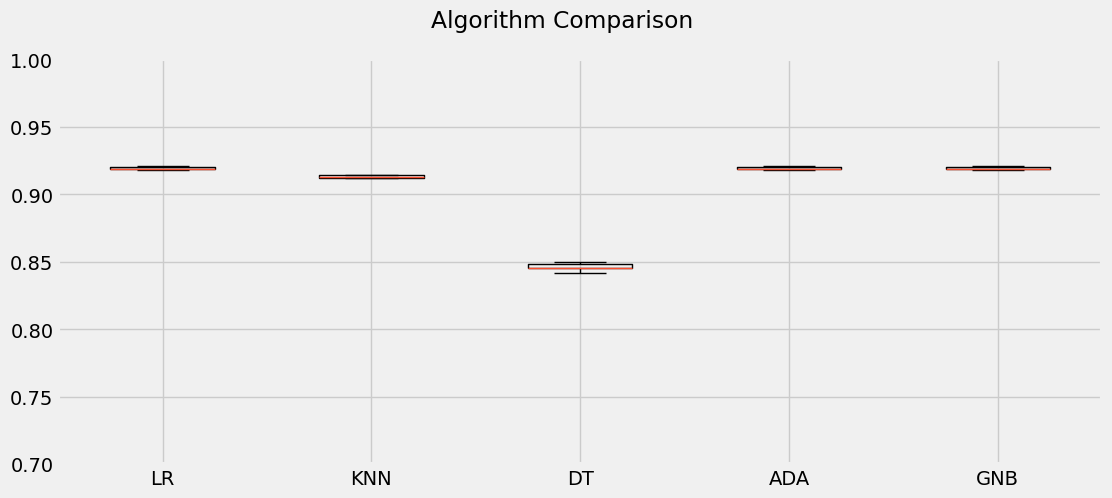

In [264]:
#using other model 
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scorer = make_scorer(f1_score)  
for name, model in models:
    
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [12, 5]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylim(0.7, 1)
plt.show()

# Only use the categorical variables to build model

In [265]:
df_final_cat = dummies
df_final_cat

TARGET  CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA   
0            1              0              1                0  \
1            0              1              0                0   
2            0              0              1                0   
3            0              1              0                0   
4            0              0              1                0   
...        ...            ...            ...              ...   
307506       0              0              1                0   
307507       0              1              0                0   
307508       0              1              0                0   
307509       1              1              0                0   
307510       0              1              0                0   

        NAME_EDUCATION_TYPE_Academic degree   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
307506                                    0   
307507                                    0   
307508                                    0   
307509                                    0   
307510                                    0   

        NAME_EDUCATION_TYPE_Higher education   
0                                          0  \
1                                          1   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
307506                                     0   
307507                                     0   
307508                                     1   
307509                                     0   
307510                                     1   

        NAME_EDUCATION_TYPE_Incomplete higher   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
307506                                      0   
307507                                      0   
307508                                      0   
307509                                      0   
307510                                      0   

        NAME_EDUCATION_TYPE_Lower secondary   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
307506                                    0   
307507                                    0   
307508                                    0   
307509                                    0   
307510                                    0   

        NAME_EDUCATION_TYPE_Secondary / secondary special   
0                                                       1  \
1                                                       0   
2                                                       1   
3                                                       1   
4                                                       1   
...                                                   ...   
307506                                                  1   
307507                                                  1   
307508                                                  0   
307509                                                  1   
307510                                                  0   

        OCCUPATION_TYPE_Accountants  ...  CUSTOMER_AGE_30-40   
0                                 0  ...                   0  \
1                                 0  ...                   0   
2     

In [266]:
df_final_cat = categorical_cols

In [267]:
# Split the data into train and test sets
train_data_cat, test_data_cat = train_test_split(df_final_cat, test_size=0.3, random_state=42)
# Print the shapes of train and test sets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (215257, 137)
Test set shape: (92254, 137)


In [268]:
X_train_cat = train_data.iloc[:, 1:]
y_train_cat = train_data.iloc[:, 0]
X_test_cat = test_data.iloc[:, 1:]
y_test_cat = test_data.iloc[:, 0]

In [269]:
X_train_cat = X_train_cat.drop(columns =['TARGET'])
X_test_cat = X_test_cat.drop(columns =['TARGET'])

In [270]:
#LinearDiscrimint Analysis model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5,shuffle=True, random_state=42)
result = cross_val_score(model, X_test_cat, y_test_cat, cv=kfold, scoring= scorer, error_score='raise')
print(result.mean())

0.002423151655614273


In [271]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics 

# Baseline Random forest based Model`
rfc = RandomForestClassifier(n_estimators=200)
rfc_f = rfc.fit(X_train_cat, y_train_cat)
def score(m, X_train_cat, y_train_cat, X_test_cat, y_test_cat, train=True):
    if train:
        pred=m.predict(X_train_cat)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train_cat, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train_cat, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train_cat, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train_cat, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train_cat, pred)}")
    elif train == False:
        pred=m.predict(X_test_cat)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test_cat, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test_cat, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test_cat, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test_cat, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test_cat, pred)}")

In [272]:
score(rfc_f, X_train_cat, y_train_cat, X_test_cat, y_test_cat, train=False)

Test Result:

Accuracy Score: 91.97%
Precision Score: 100.00%
Recall Score: 0.04%
F1 score: 0.08%
Confusion Matrix:
 [[84841     0]
 [ 7410     3]]


In [273]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_train_cat, y_train_cat)
score(xgb, X_train_cat, y_train_cat, X_test_cat, y_test_cat, train=False)

Test Result:

Accuracy Score: 91.95%
Precision Score: 36.21%
Recall Score: 0.28%
F1 score: 0.56%
Confusion Matrix:
 [[84804    37]
 [ 7392    21]]


In [275]:
new_categorical_col

CODE_GENDER            NAME_EDUCATION_TYPE OCCUPATION_TYPE   
0                M  Secondary / secondary special        Laborers  \
1                F               Higher education      Core staff   
2                M  Secondary / secondary special        Laborers   
3                F  Secondary / secondary special        Laborers   
4                M  Secondary / secondary special      Core staff   
...            ...                            ...             ...   
307506           M  Secondary / secondary special     Sales staff   
307507           F  Secondary / secondary special           Other   
307508           F               Higher education        Managers   
307509           F  Secondary / secondary special        Laborers   
307510           F               Higher education        Laborers   

             ORGANIZATION_TYPE INCOME_RANGE CREDIT_RANK CUSTOMER_AGE   
0       Business Entity Type 3    200K-300K    300-500K        20-30  \
1                       School    200K-300K    Above 1M        40-50   
2                   Government       0-115K      0-300K     Above 50   
3       Business Entity Type 3    115K-150K    300-500K     Above 50   
4                     Religion    115K-150K   500K-800K     Above 50   
...                        ...          ...         ...          ...   
307506                Services    150K-200K      0-300K        20-30   
307507                     XNA       0-115K      0-300K     Above 50   
307508                  School    150K-200K   500K-800K        40-50   
307509  Business Entity Type 1    150K-200K    300-500K        30-40   
307510  Business Entity Type 3    150K-200K   500K-800K        40-50   

       YEARS_EMPLOYED  
0                 0-5  
1                 0-5  
2                 0-5  
3                5-10  
4                5-10  
...               ...  
307506            0-5  
307507            NaN  
307508          20-30  
307509          10-20  
307510            0-5  

[307511 rows x 8 columns]

In [276]:
dummies = pd.get_dummies(new_categorical_col)
dummies = dummies.replace({True: 1, False: 0})

In [277]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 108 entries, CODE_GENDER_F to YEARS_EMPLOYED_Above 50
dtypes: int64(108)
memory usage: 253.4 MB


In [278]:
#Join numeric_col and categorical_col
new_df_final = pd.concat([numeric_cols, dummies], axis=1)

In [279]:
new_df_final

TARGET  CNT_CHILDREN  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE   
0            1             0    4.065975      24700.5         351000.0  \
1            0             0   12.935025      35698.5        1129500.0   
2            0             0    1.350000       6750.0         135000.0   
3            0             0    3.126825      29686.5         297000.0   
4            0             0    5.130000      21865.5         513000.0   
...        ...           ...         ...          ...              ...   
307506       0             0    2.547000      27558.0         225000.0   
307507       0             0    2.695500      12001.5         225000.0   
307508       0             0    6.776640      29979.0         585000.0   
307509       1             0    3.701070      20205.0         319500.0   
307510       0             0    6.750000      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED   
0                         0.018801   25.920548            637  \
1                         0.003541   45.931507           1188   
2                         0.010032   52.180822            225   
3                         0.008019   52.068493           3039   
4                         0.028663   54.608219           3038   
...                            ...         ...            ...   
307506                    0.032561   25.553425            236   
307507                    0.025164   56.917808         365243   
307508                    0.005002   41.002740           7921   
307509                    0.005313   32.769863           4786   
307510                    0.046220   46.180822           1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  CUSTOMER_AGE_30-40   
0                  3648.0             2120  ...                   0  \
1                  1186.0              291  ...                   0   
2                  4260.0             2531  ...                   0   
3                  9833.0             2437  ...                   0   
4                  4311.0             3458  ...                   0   
...                   ...              ...  ...                 ...   
307506             8456.0             1982  ...                   0   
307507             4388.0             4090  ...                   0   
307508             6737.0             5150  ...                   0   
307509             2562.0              931  ...                   1   
307510             5128.0              410  ...                   0   

        CUSTOMER_AGE_40-50  CUSTOMER_AGE_Above 50  YEARS_EMPLOYED_0-5   
0                        0                      0                   1  \
1                        1                      0                   1   
2                        0                      1                   1   
3                        0                      1                   0   
4                        0                      1                   0   
...                    ...                    ...                 ...   
307506                   0                      0                   1   
307507                   0                      1                   0   
307508                   1                      0                   0   
307509                   0                      0                   0   
307510                   1                      0                   1   

        YEARS_EMPLOYED_5-10  YEARS_EMPLOYED_10-20  YEARS_EMPLOYED_20-30   
0                         0                     0                     0  \
1                         0                     0                     0   
2                         0                     0                     0   
3                         1                     0                     0   
4                         1                     0                     0   
...                     ...                   ...                   ...   
307506                    0                     0                     0   
307507  

In [280]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
train_data, test_data = train_test_split(new_df_final, test_size=0.3, random_state=42)
# Print the shapes of train and test sets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (215257, 136)
Test set shape: (92254, 136)


In [281]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

In [282]:
X_train

CNT_CHILDREN  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE   
127044             0     7.06410      67072.5         679500.0  \
281143             1     5.45040      25407.0         450000.0   
199799             1     9.42300      27679.5         675000.0   
306749             2     1.80000       9000.0         180000.0   
301347             0     7.29792      37390.5         630000.0   
...              ...         ...          ...              ...   
119879             0     6.75000      32602.5         675000.0   
259178             2     5.09922      40419.0         472500.0   
131932             0    11.25000      33025.5        1125000.0   
146867             1     2.70000      13500.0         270000.0   
121958             0     7.29792      35239.5         630000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED   
127044                    0.032561   40.145205           2062  \
281143                    0.007114   38.342466           2246   
199799                    0.022625   59.416438           1335   
306749                    0.006629   35.810959           2292   
301347                    0.046220   53.879452         365243   
...                            ...         ...            ...   
119879                    0.006305   39.673973           1124   
259178                    0.003069   42.443836            292   
131932                    0.014520   39.202740           5929   
146867                    0.010006   34.810959           1868   
121958                    0.009630   36.098630            733   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...   
127044             8599.0             2087               1  ...  \
281143              348.0              172               1  ...   
199799             6306.0             4026               1  ...   
306749              742.0             1201               1  ...   
301347              169.0             3112               0  ...   
...                   ...              ...             ...  ...   
119879             3813.0             4134               1  ...   
259178             1613.0             4465               1  ...   
131932             5038.0             5123               1  ...   
146867              923.0             4406               1  ...   
121958             3034.0             4449               1  ...   

        CUSTOMER_AGE_30-40  CUSTOMER_AGE_40-50  CUSTOMER_AGE_Above 50   
127044                   0                   1                      0  \
281143                   1                   0                      0   
199799                   0                   0                      1   
306749                   1                   0                      0   
301347                   0                   0                      1   
...                    ...                 ...                    ...   
119879                   1                   0                      0   
259178                   0                   1                      0   
131932                   1                   0                      0   
146867                   1                   0                      0   
121958                   1                   0                      0   

        YEARS_EMPLOYED_0-5  YEARS_EMPLOYED_5-10  YEARS_EMPLOYED_10-20   
127044                   0                    1                     0  \
281143                   0                    1                     0   
199799                   1                    0                     0   
306749                   0                    1                     0   
301347                   0                    0                     0   
...                    ...                  ...                   ...   
119879                   1                    0                     0   
259178                   1                    0                     0   
131932                   0                    0                     1   
146867                

In [284]:
X_train = X_train.drop(columns =['TARGET'])
X_test = X_test.drop(columns =['TARGET'])

KeyError: "['TARGET'] not found in axis"

In [285]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics 

# Baseline Random forest based Model`
rfc = RandomForestClassifier(n_estimators=200)
rfc_f = rfc.fit(X_train, y_train)
def score(m, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred=m.predict(X_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(X_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")

In [286]:
#evaluate the RandomForestClassifier model using confusion_matrix
score(rfc_f, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 91.97%
Precision Score: 100.00%
Recall Score: 0.03%
F1 score: 0.05%
Confusion Matrix:
 [[84841     0]
 [ 7411     2]]


In [287]:
#Evaluate the RandomForestClassifier using cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)   
kfold = KFold(n_splits=5, shuffle = True, random_state=7)
result2 = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scorer)
print(result2.mean())

0.00022808324079136264


In [288]:
df_feature_rfc_f = pd.DataFrame({'feature':X_train.columns,'importances':rfc_f.feature_importances_})
df_feature_rfc_f.sort_values('importances', ascending=False)

feature   importances
8                    DAYS_ID_PUBLISH  6.537519e-02
5                         DAYS_BIRTH  6.526512e-02
7                  DAYS_REGISTRATION  6.470643e-02
2                        AMT_ANNUITY  6.035401e-02
25            DAYS_LAST_PHONE_CHANGE  5.905015e-02
..                               ...           ...
102  ORGANIZATION_TYPE_Trade: type 4  2.661603e-05
29                   CODE_GENDER_XNA  2.436648e-07
123                CUSTOMER_AGE_0-20  0.000000e+00
133             YEARS_EMPLOYED_50-60  0.000000e+00
134          YEARS_EMPLOYED_Above 50  0.000000e+00

[135 rows x 2 columns]

In [289]:
#Evaluate XGBClassifier using confusion_matrix
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)
score(xgb, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 91.95%
Precision Score: 36.21%
Recall Score: 0.28%
F1 score: 0.56%
Confusion Matrix:
 [[84804    37]
 [ 7392    21]]


In [290]:
df_feature_xgb = pd.DataFrame({'feature':X_train.columns,'importances':xgb.feature_importances_})
df_feature_xgb.sort_values('importances', ascending=False)

feature  importances
31                NAME_EDUCATION_TYPE_Higher education     0.048213
28                                       CODE_GENDER_M     0.042006
14                         REGION_RATING_CLIENT_W_CITY     0.030840
34   NAME_EDUCATION_TYPE_Secondary / secondary special     0.021631
6                                        DAYS_EMPLOYED     0.016278
..                                                 ...          ...
103                    ORGANIZATION_TYPE_Trade: type 5     0.000000
102                    ORGANIZATION_TYPE_Trade: type 4     0.000000
60                          ORGANIZATION_TYPE_Cleaning     0.000000
73                  ORGANIZATION_TYPE_Industry: type 2     0.000000
134                            YEARS_EMPLOYED_Above 50     0.000000

[135 rows x 2 columns]

# 5. Conclusion
1. Characteristic to decide whether a customer could be a defaulter:
- Customer is low-skill Labourer, avoid sales staff, laborers, driver
- Male is at higher risk than Female
- Customer has lower education level 
- Customer who is civil marriage or single/not married
- Customer who has income range from 0 -200k
- Customer is from 20-30 years old
- Customer has working experience less than 5 years
2. Characteristic to decide whether a customer could be a good repayer:
- Academic degree (higher education)
- Customer is above 50 year olds
- Customer has income above 300K
- Customer has working experience more than 30 years
3. The main outcome of this analysis is that identifying the most important features to detect the bank loan defaulter and a data analysis guideline for control risk process. The models do not have a good results, however, it depends on the dataset also. The solution is that we can create new useful features to train the models and improve the efficiency.


# 6. Suggestion:
- For those customers who have high risk to be be default, some solutions can be conducted such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
- Bank can utilise the variables which are strong indicators of default for their portfolio and risk assessment.